# Breast Cancer Wisconsin (Diagnostic)

Importamos librerias para manejo de datos, visualizacion y redes neuronales. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from summarytools import dfSummary
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf
import tensorflow.keras as kr

Cargamos nuestro dataset

In [2]:
df = pd.read_csv('data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

Generamos resumen del dataset 

In [3]:
dfSummary(df)

Verificamos la cantidad de datos para cada categoria de la columna "diagnosis", la cual va a ser nuestra variable dependiente.

In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

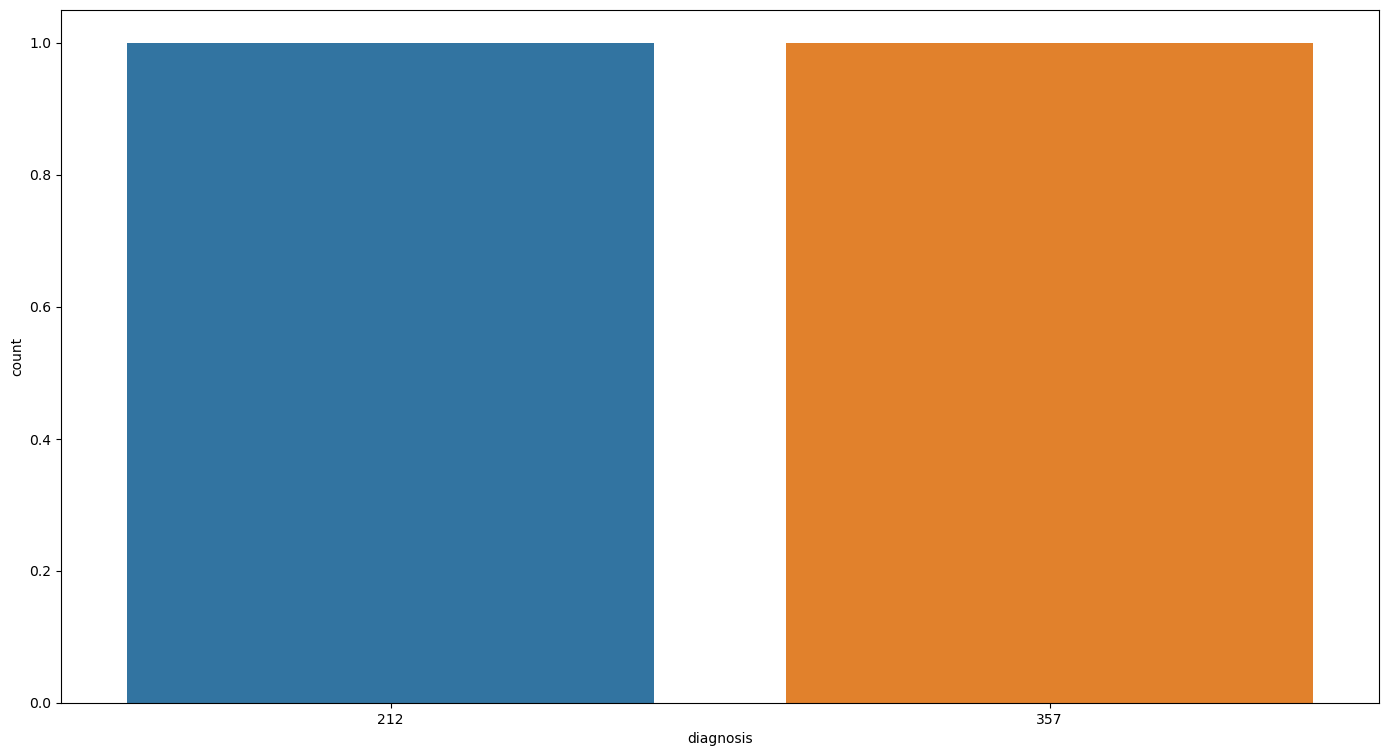

In [5]:
plt.figure(figsize=[17,9])
sb.countplot(data=df, x=df['diagnosis'].value_counts())
plt.show()

Verificamos si hay columnas que contengan valores nulos

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Existe una columna con 569 valores nulos, por lo que vamos a eliminarla

In [7]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

Creamos una función para categorizar las variables 

In [8]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

Vemos el tipo de variable <br>
Identificamos cuales variables son continuas

In [9]:
continuas, discretas, categoricas = getColumnTypes(df)
print(f'{continuas = }')
print(f'{discretas = }')
print(f'{categoricas = }')

continuas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
discretas = []
categoricas = ['diagnosis']


Ahora vamos a dividir el dataset en variables dependientes e independietes

In [10]:
# independientes, quitamos la columna de la variable dependiente
x = df.drop('diagnosis',axis=1)

#variable dependiente
#diagnosis
#B = benigno, M = maligno
y = df.diagnosis

Creamos una función  para ver el comportamiento de forma gráfica de las variables 

In [11]:
def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualización de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.histplot(dataset[col], bins=30)
     plt.title("Histograma y Densidad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

C:\Users\Pc\AppData\Local\Temp\ipykernel_23240\3224723402.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 6))


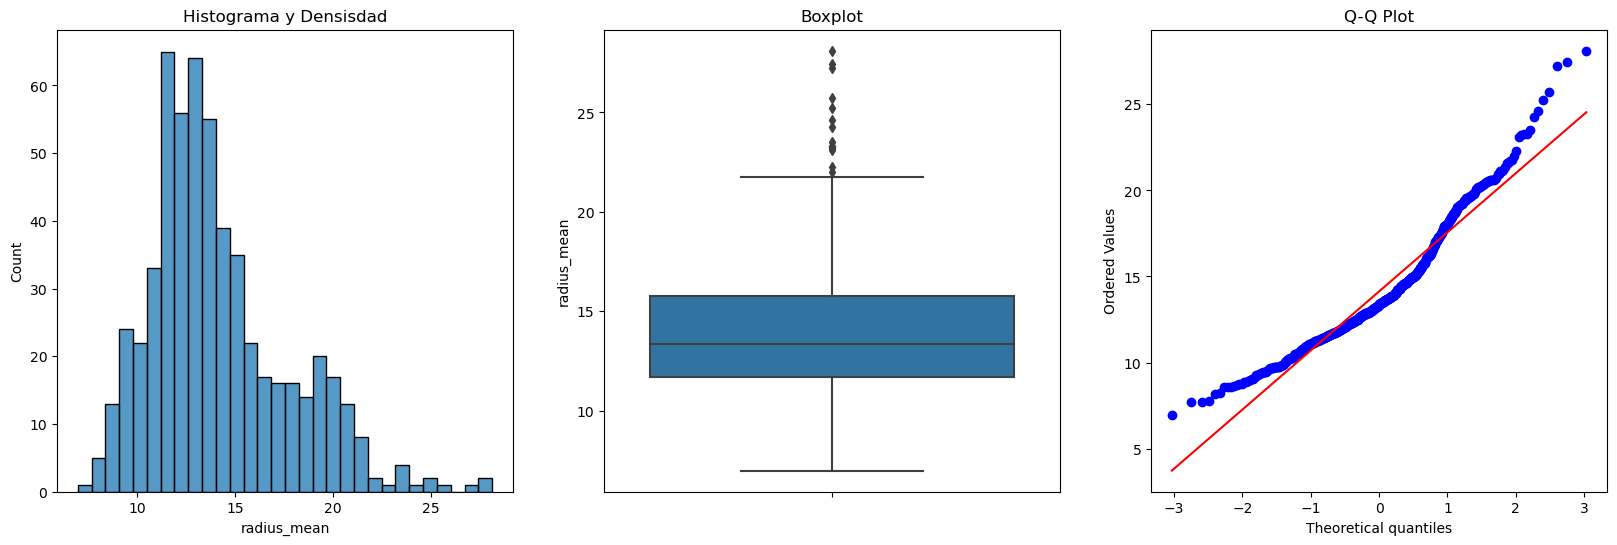

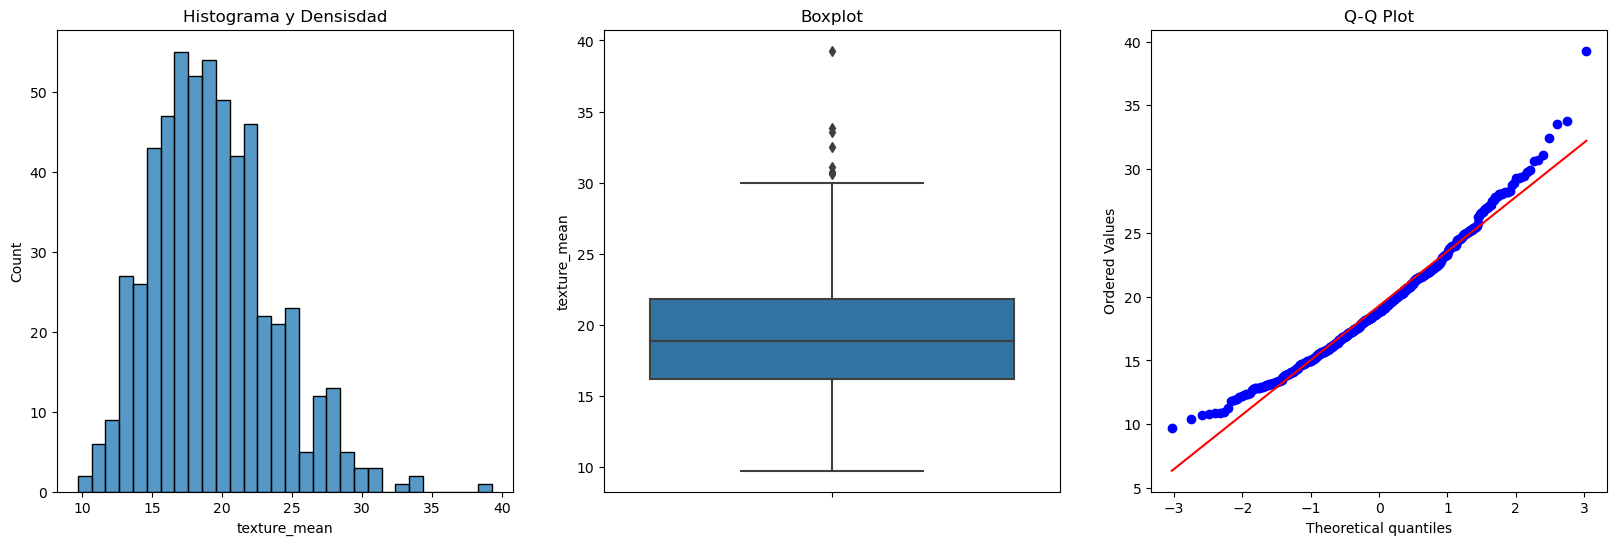

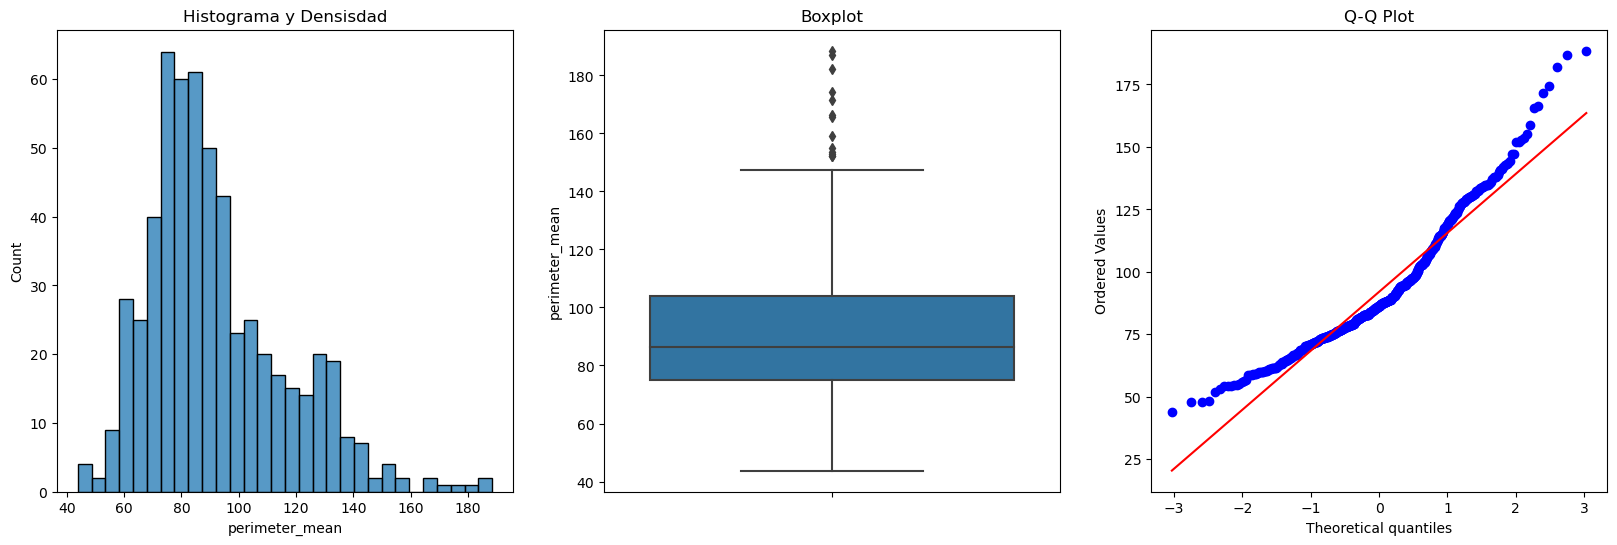

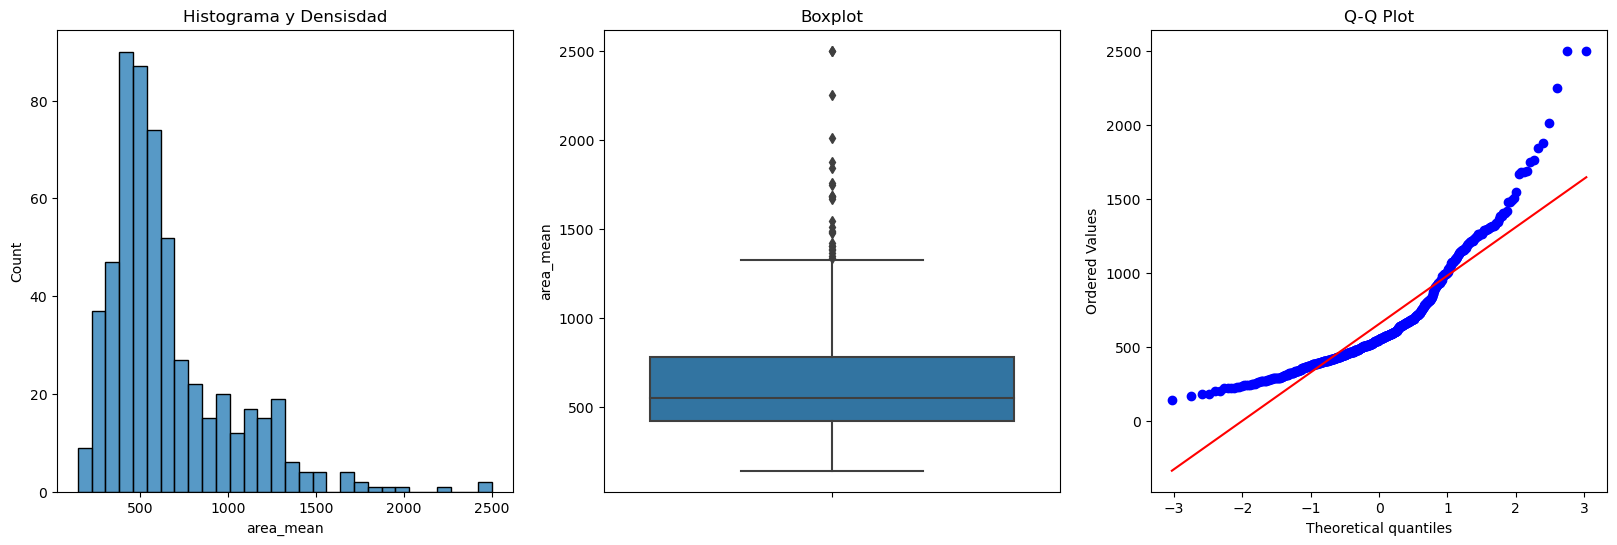

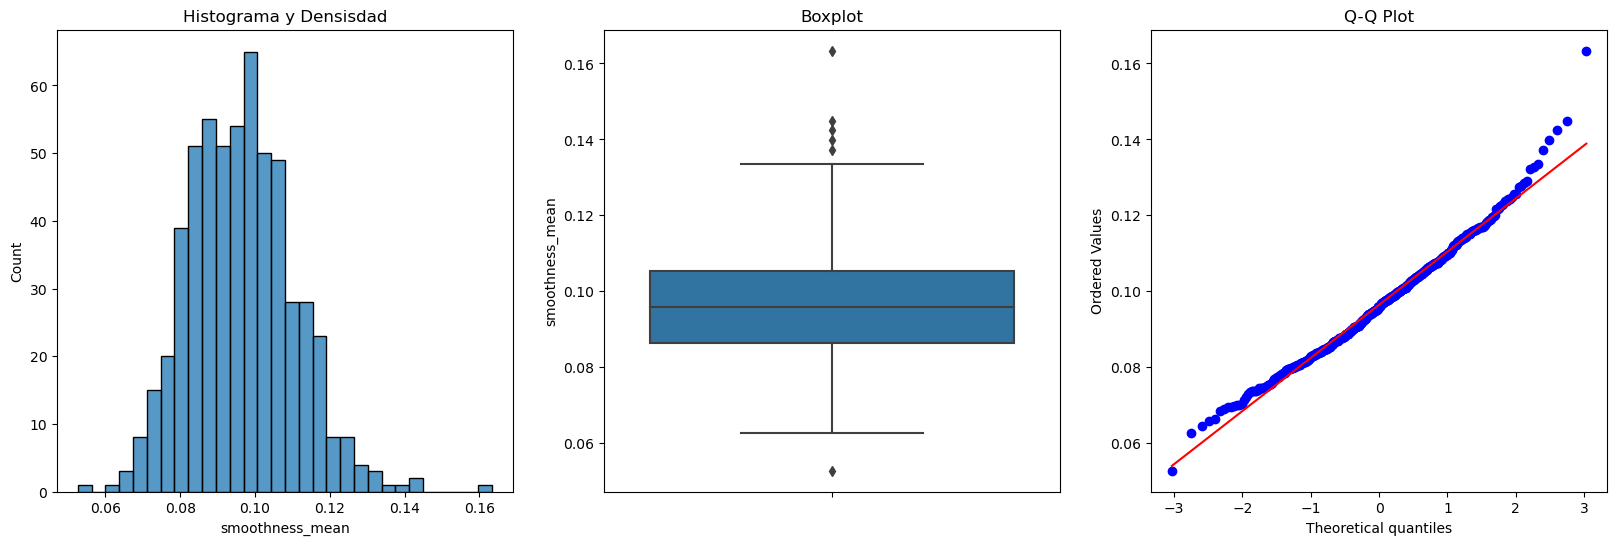

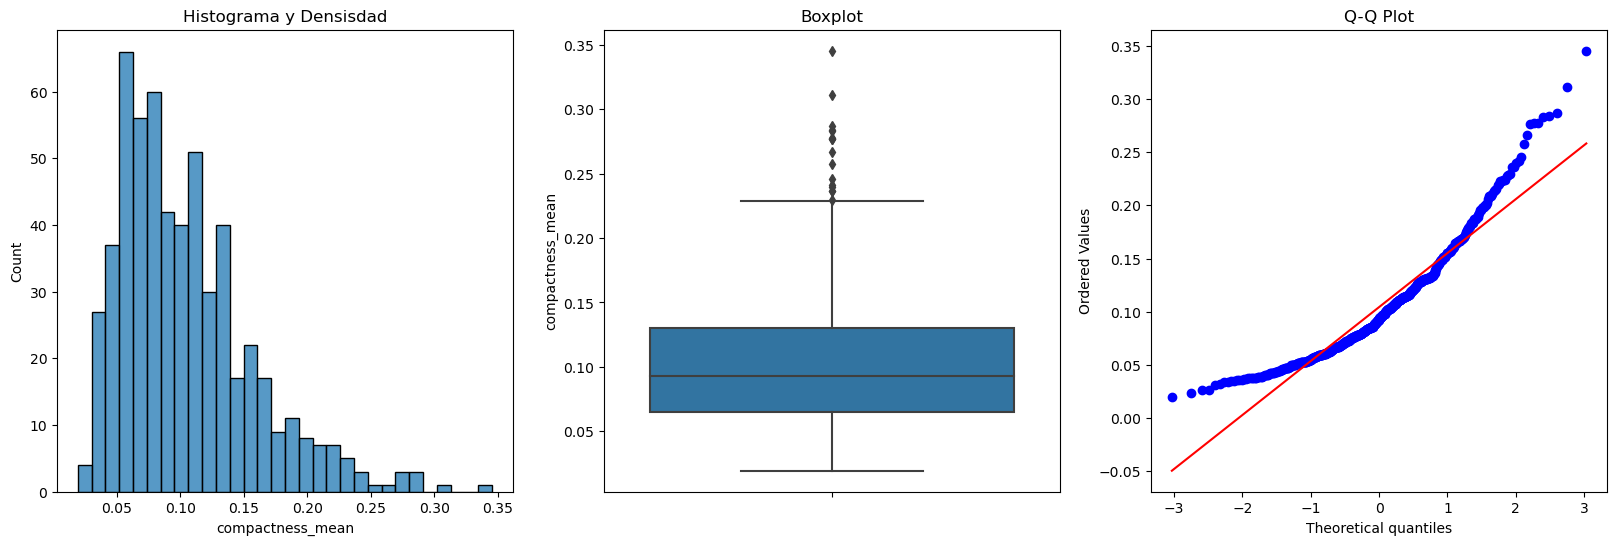

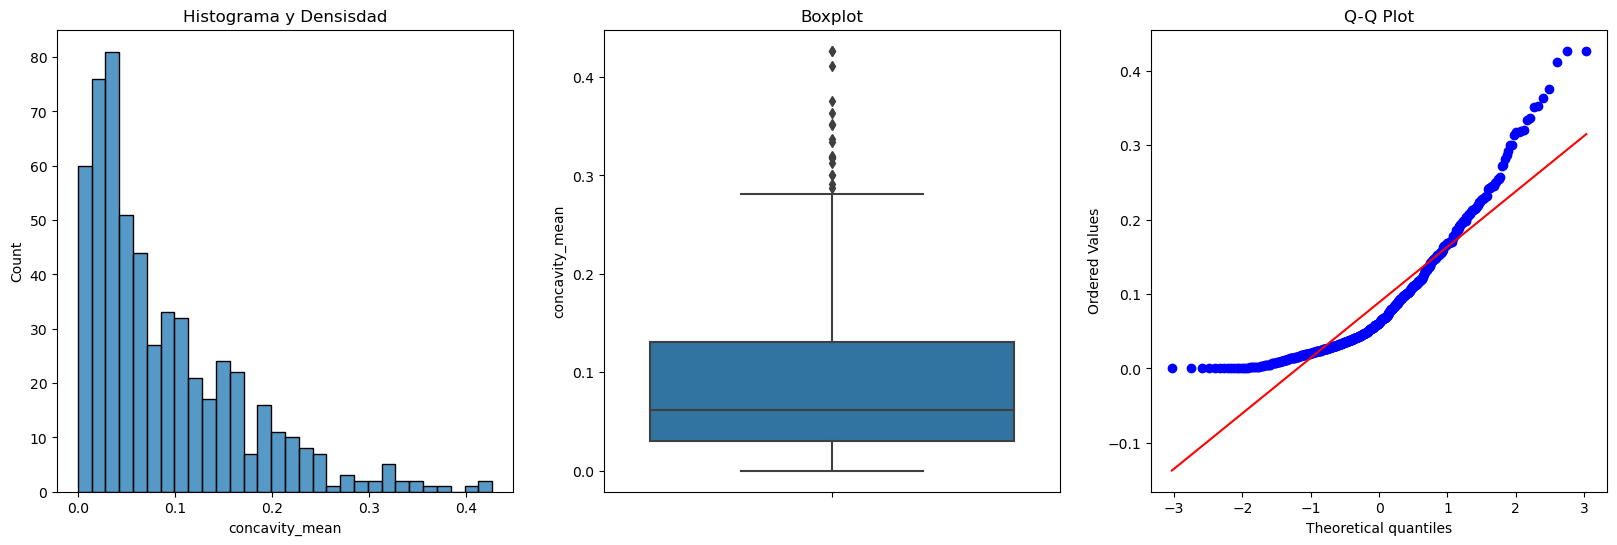

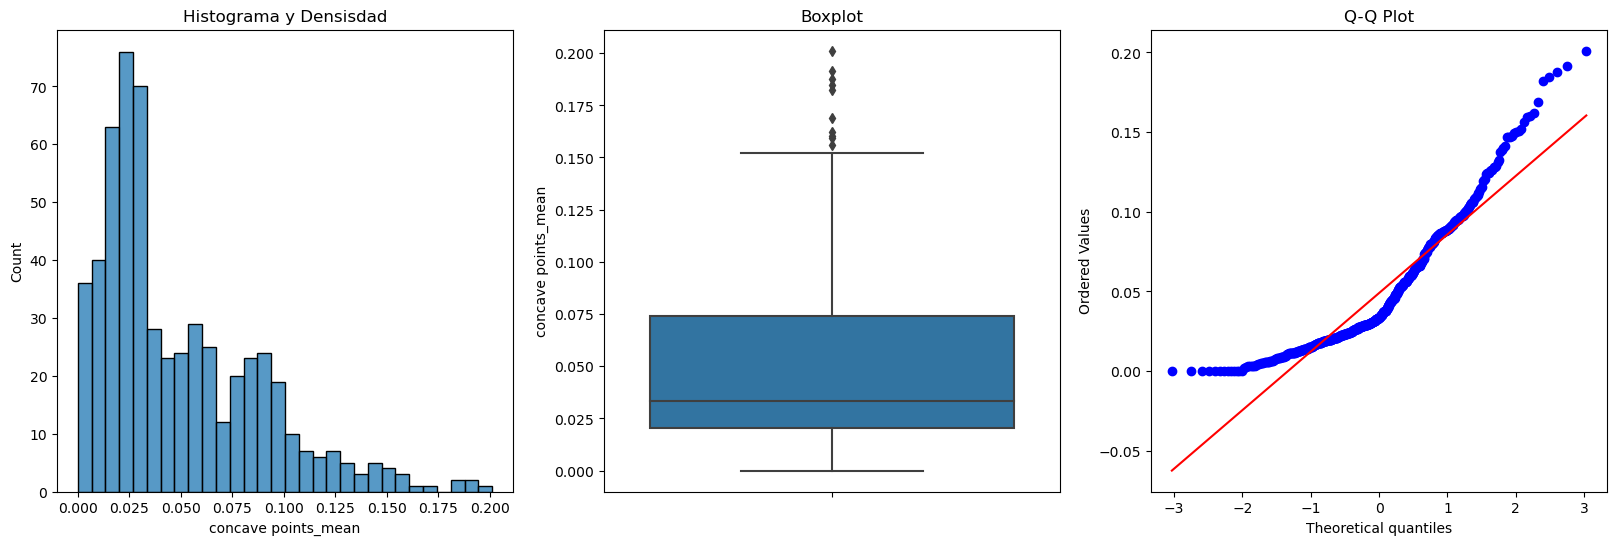

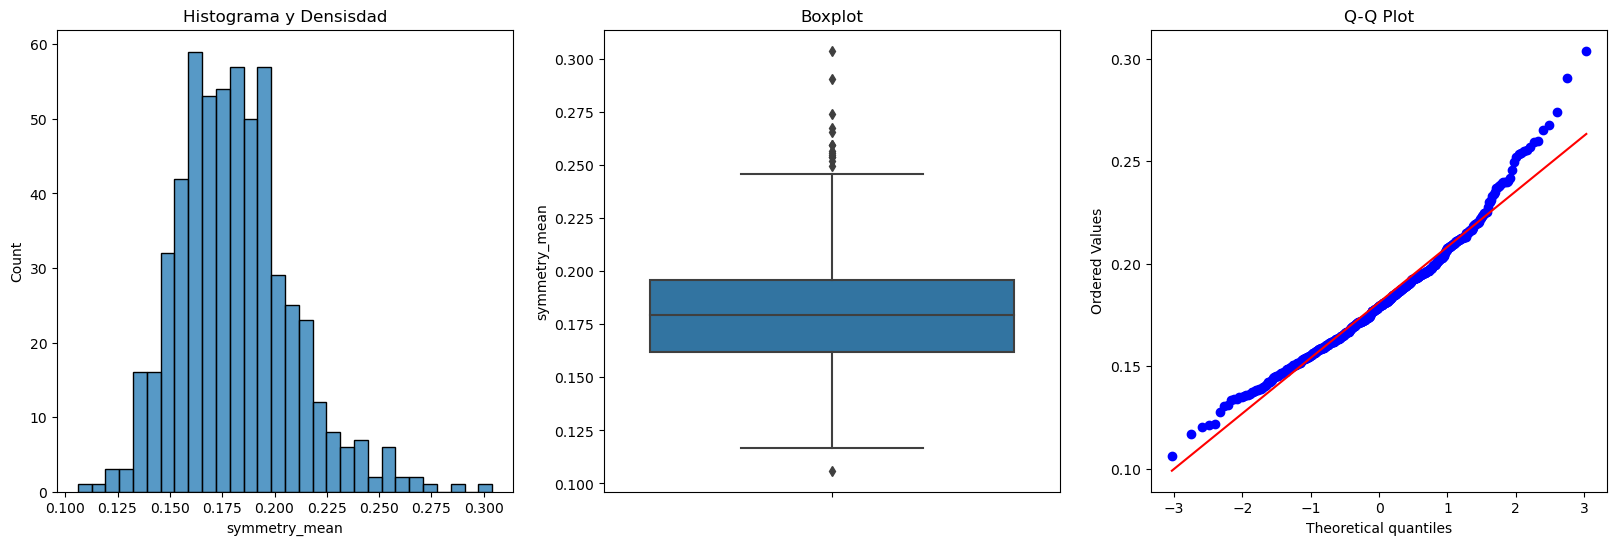

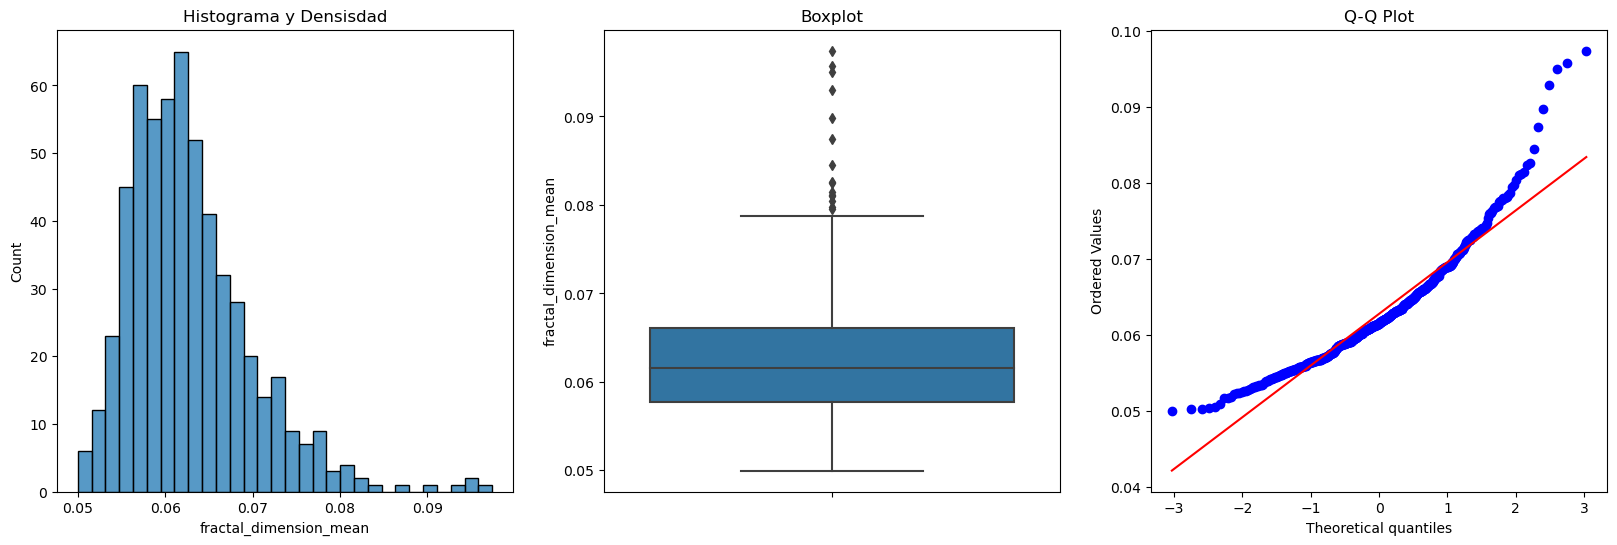

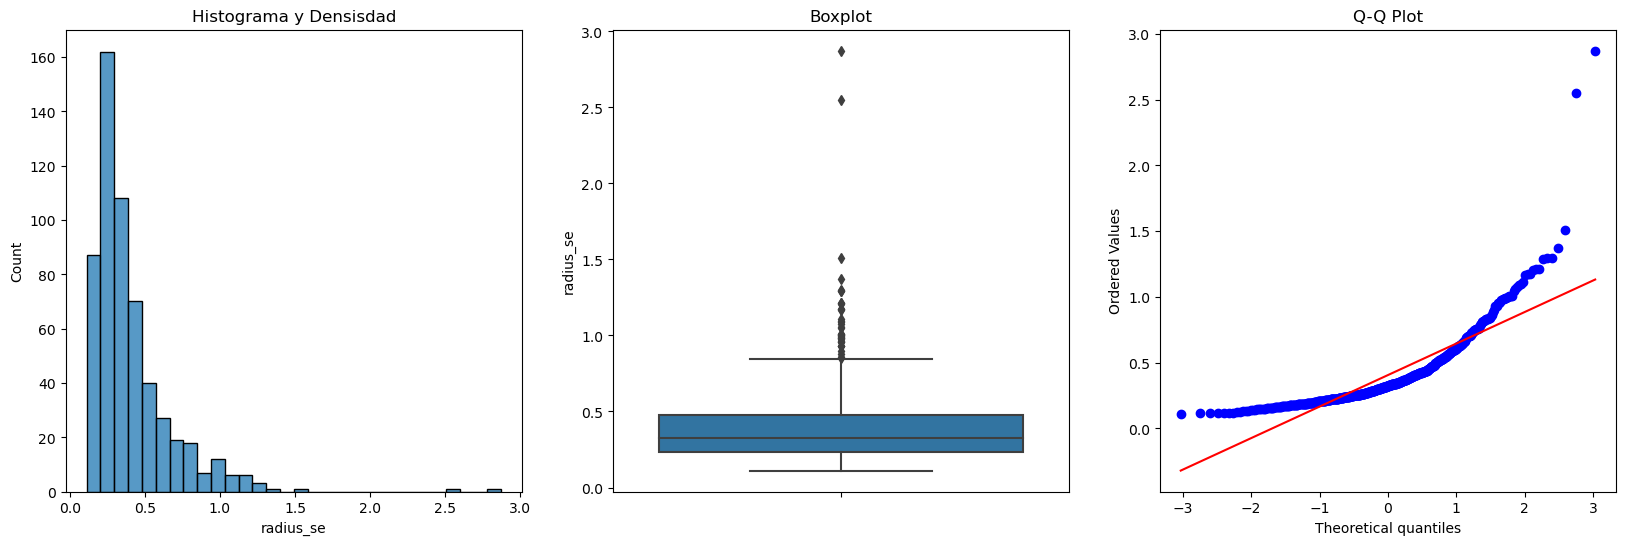

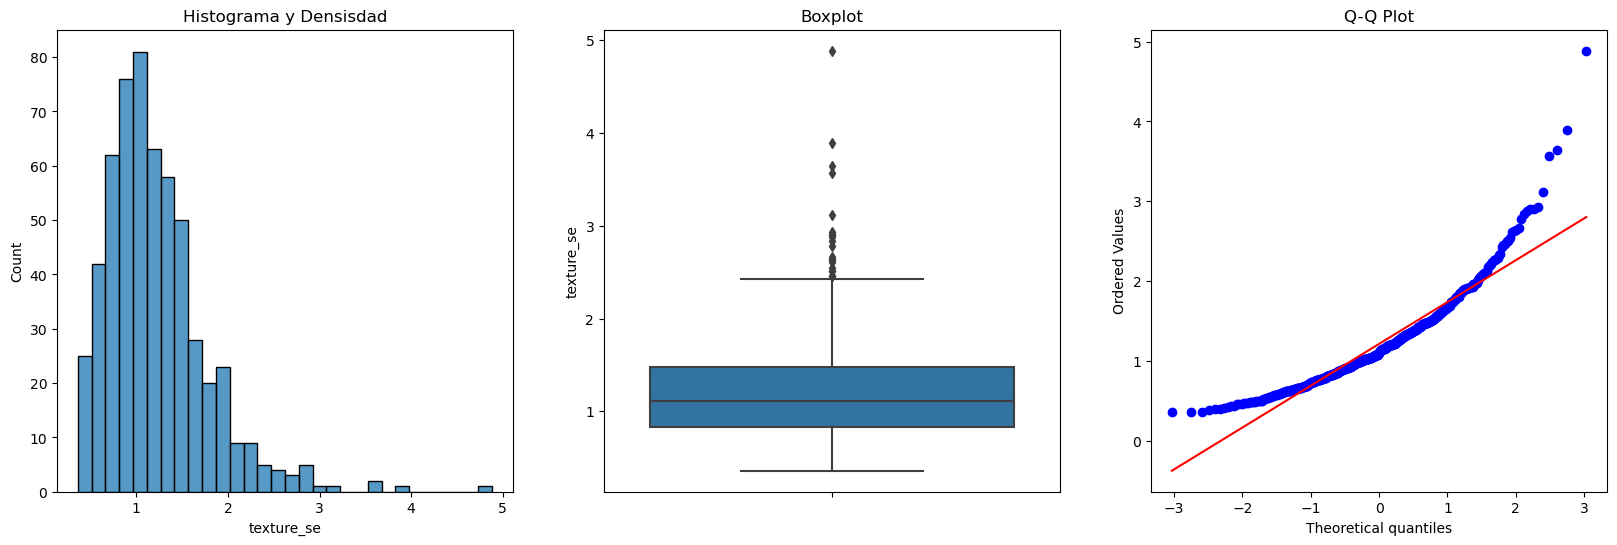

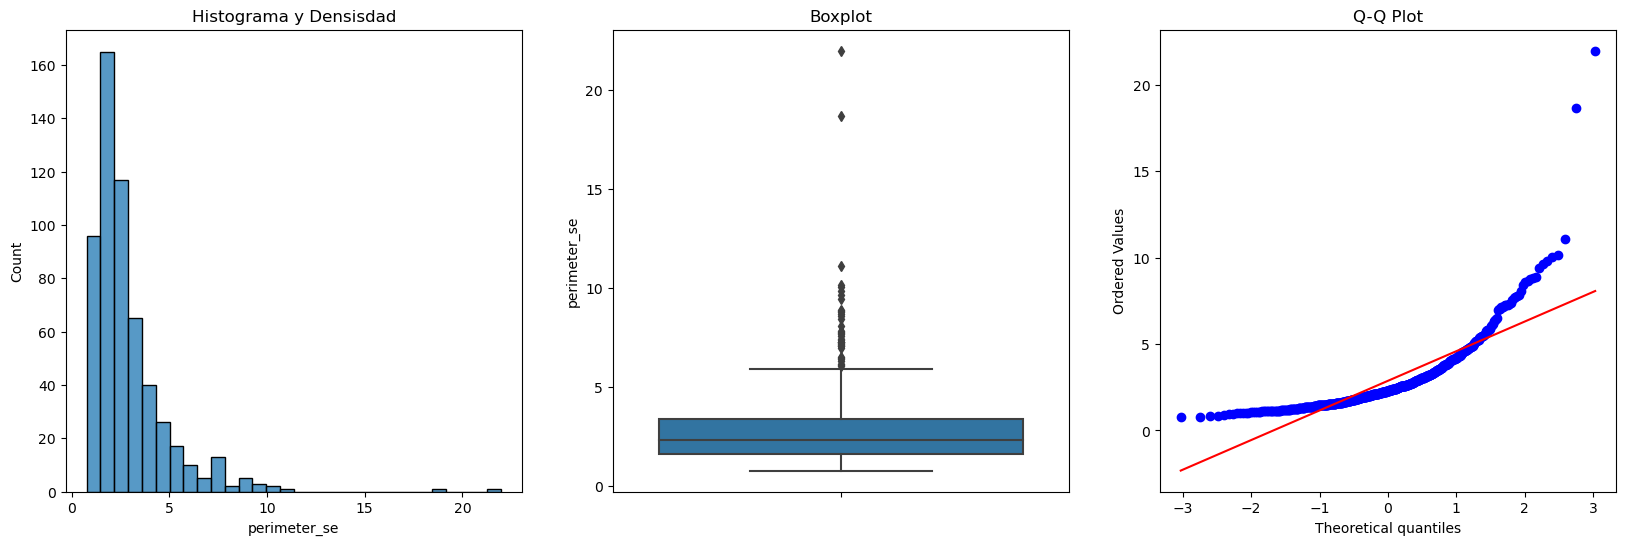

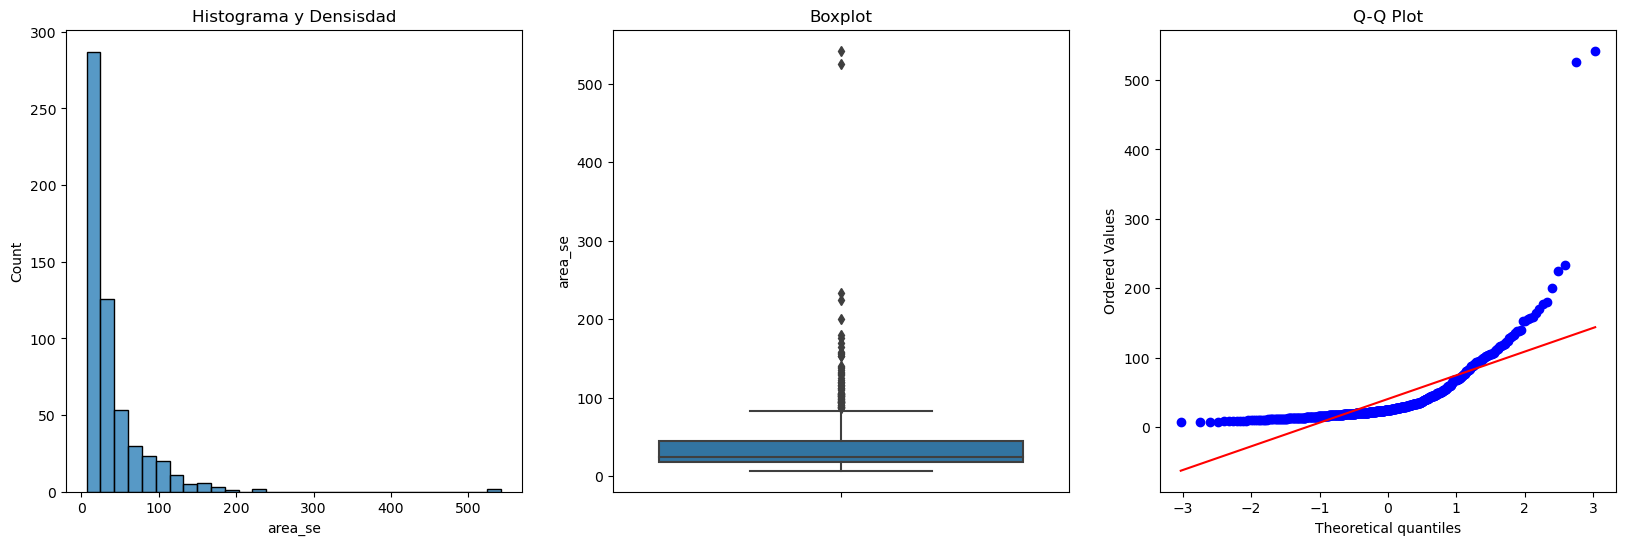

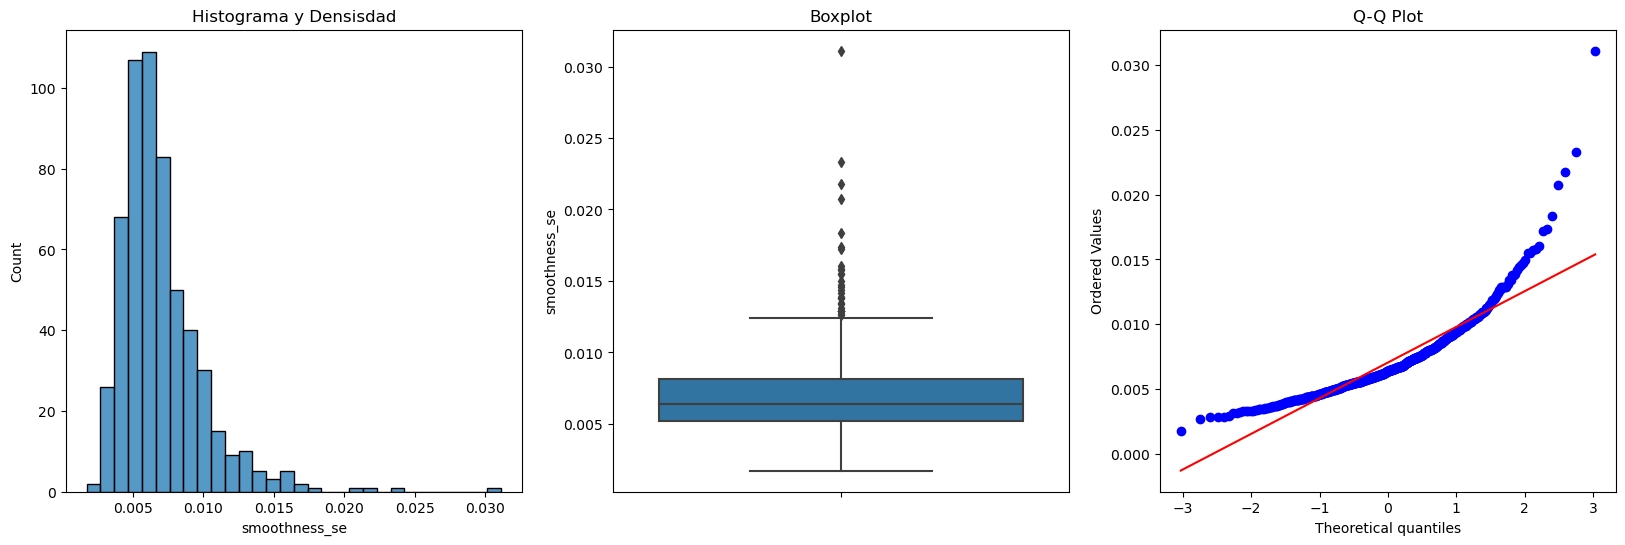

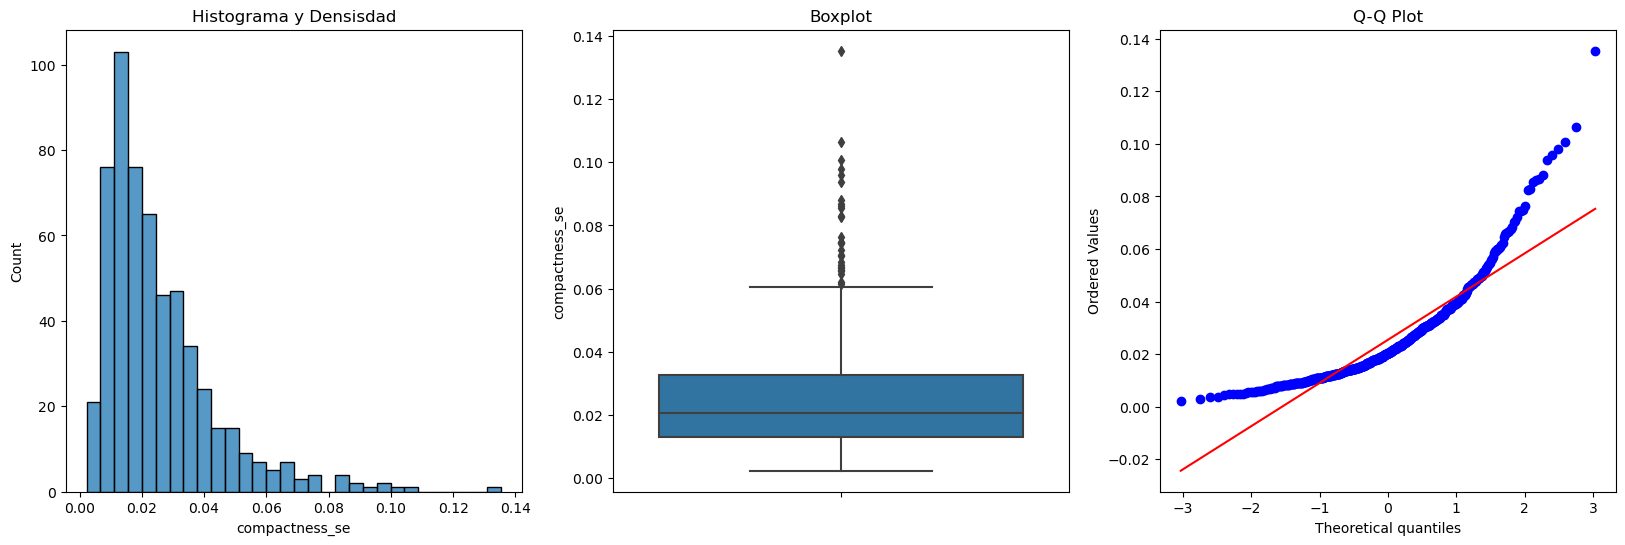

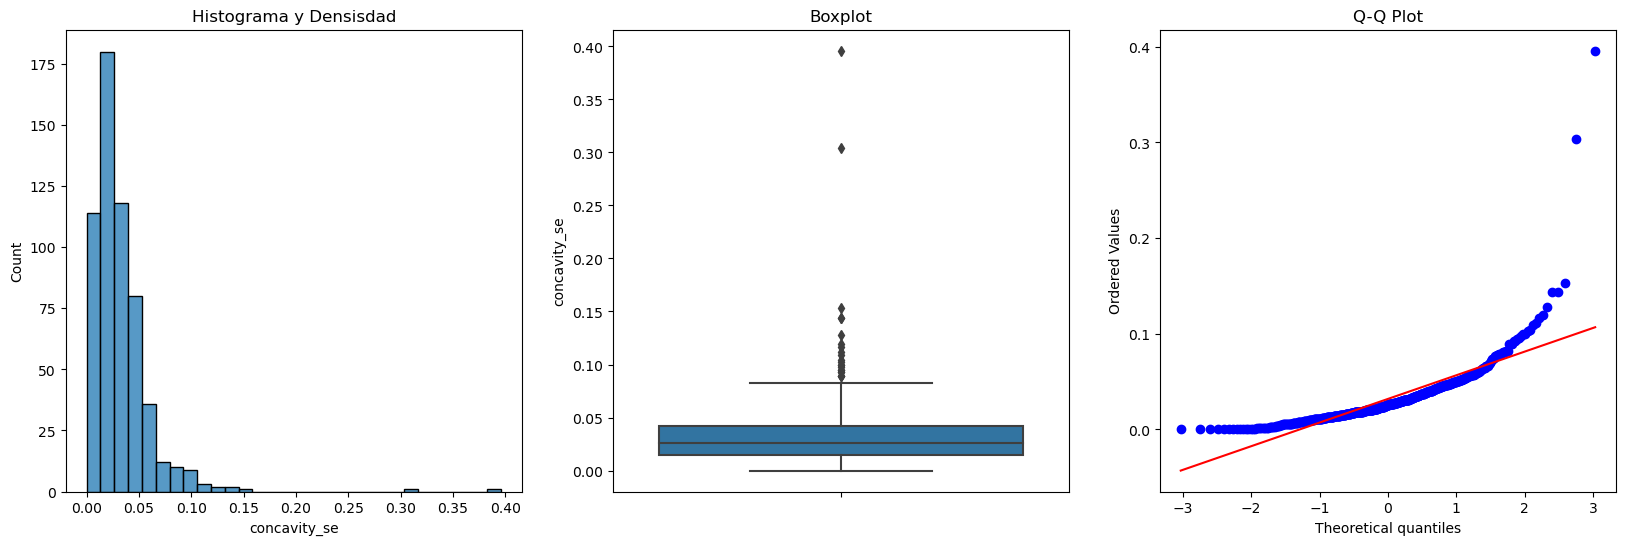

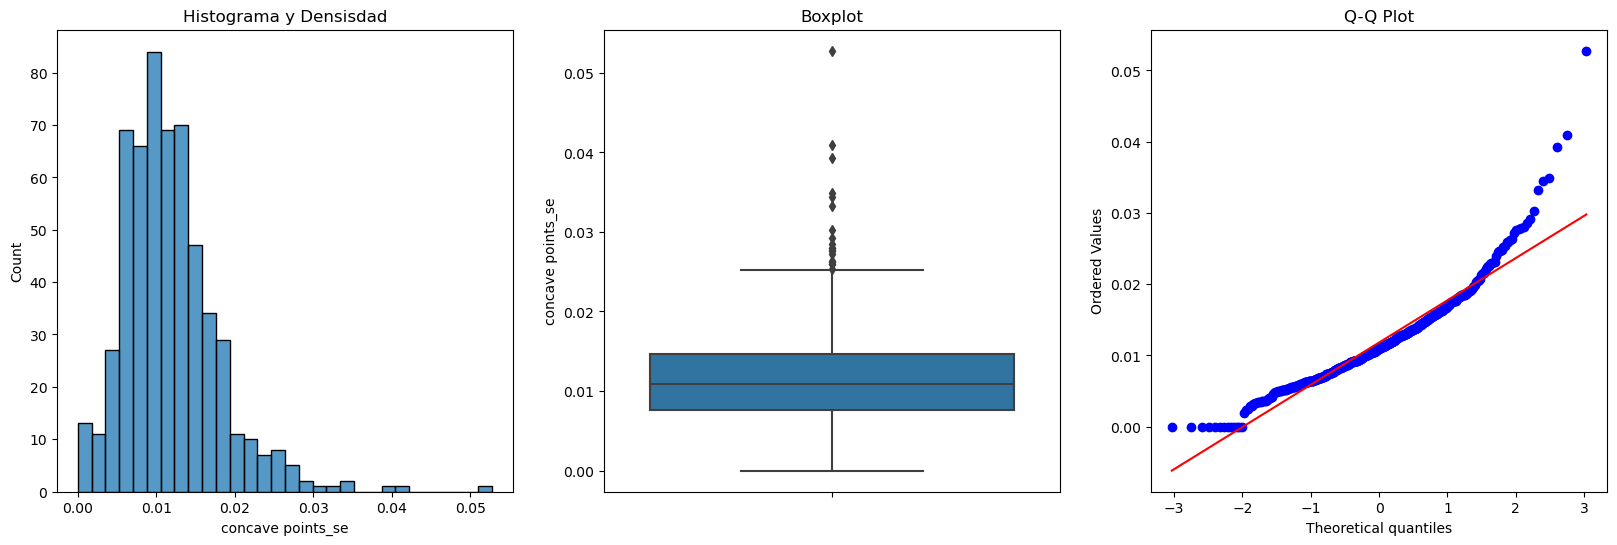

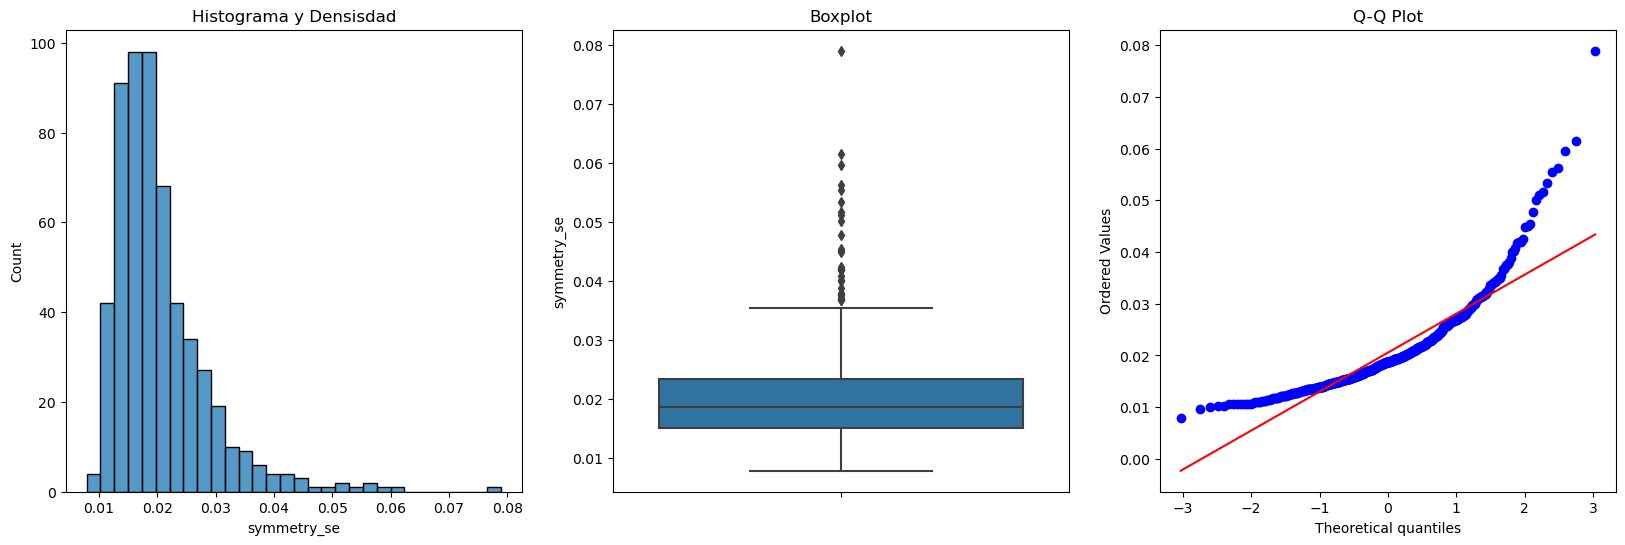

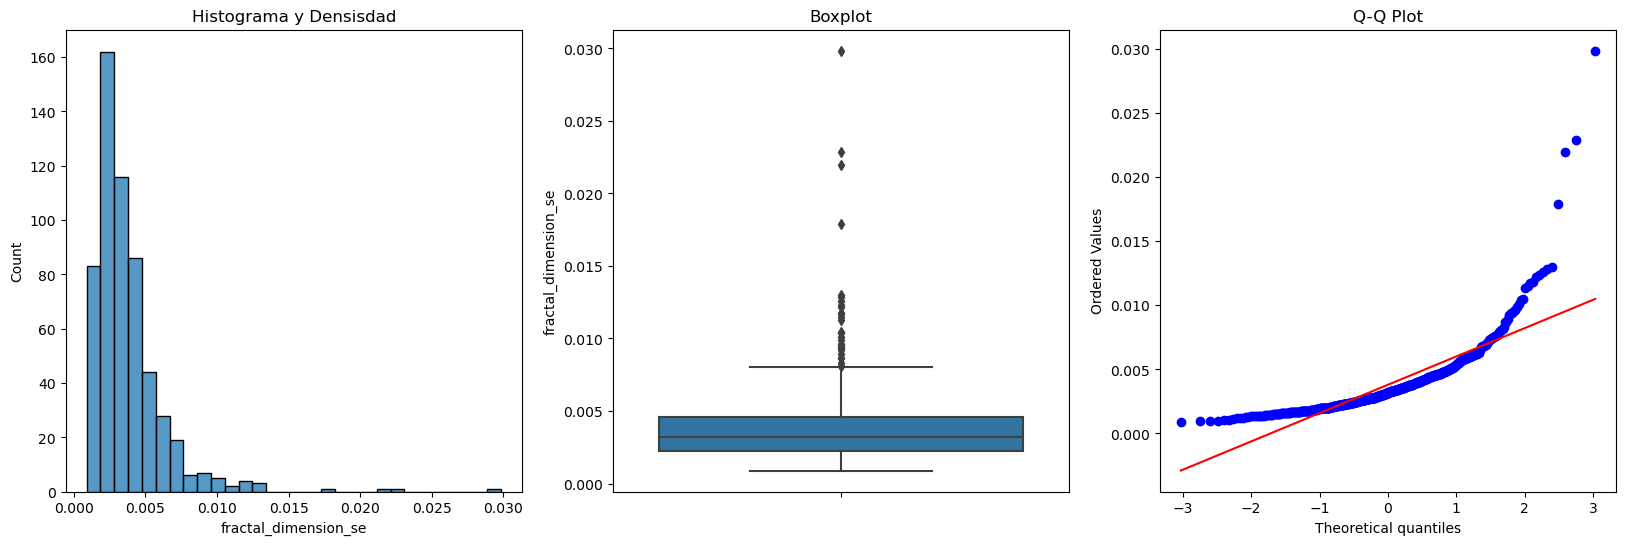

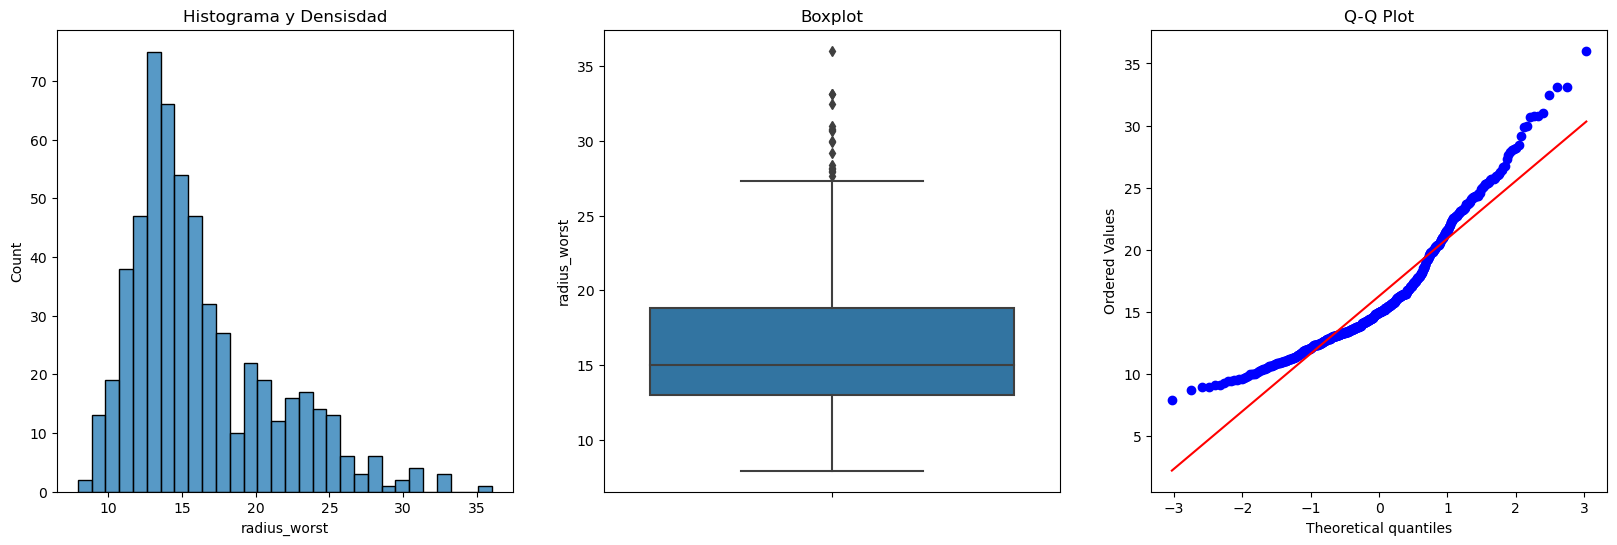

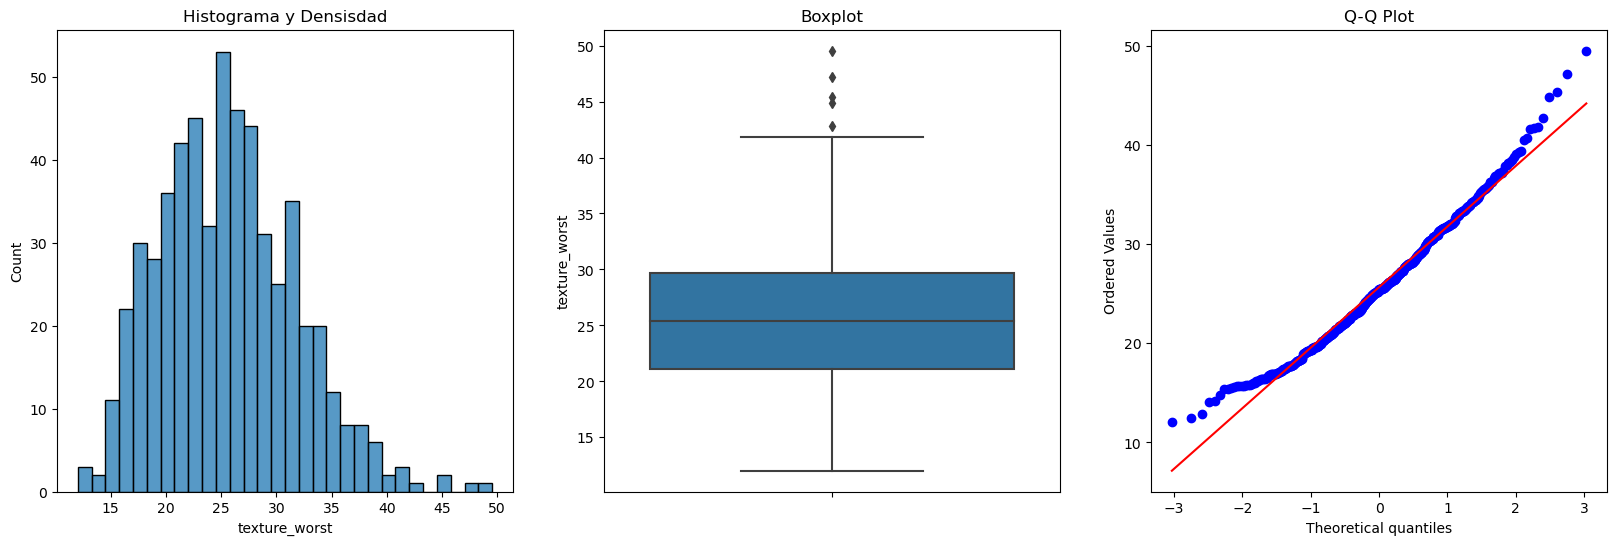

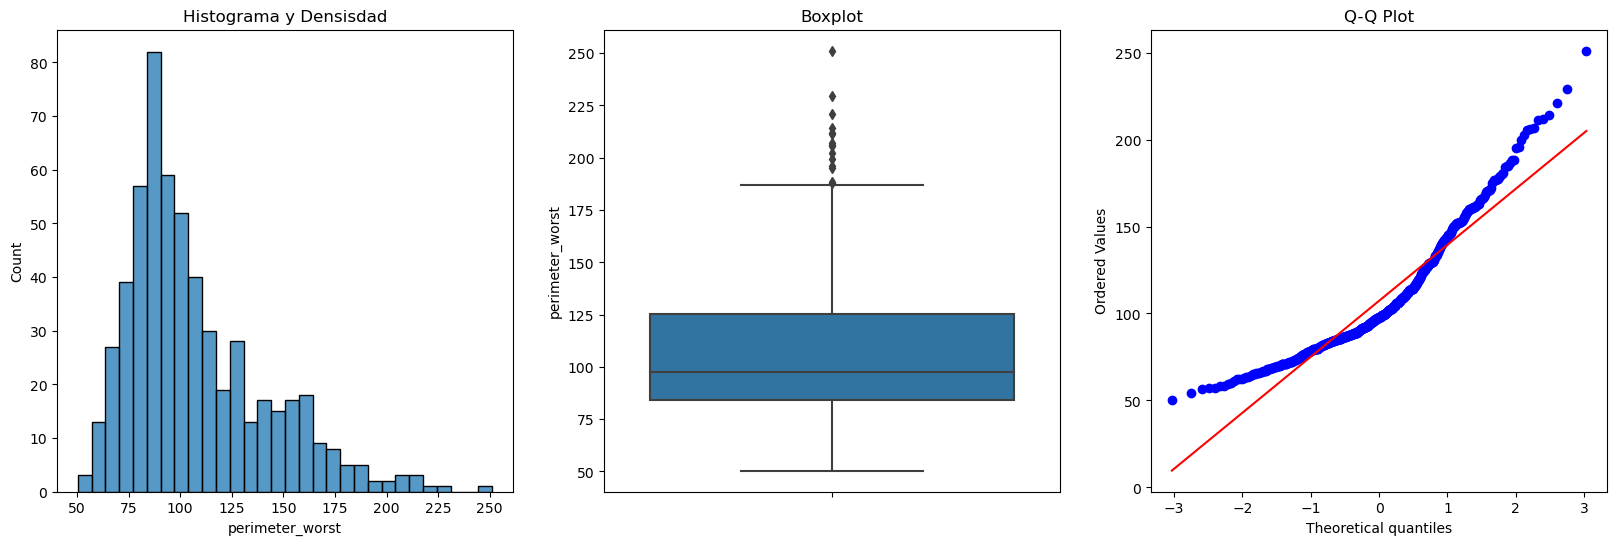

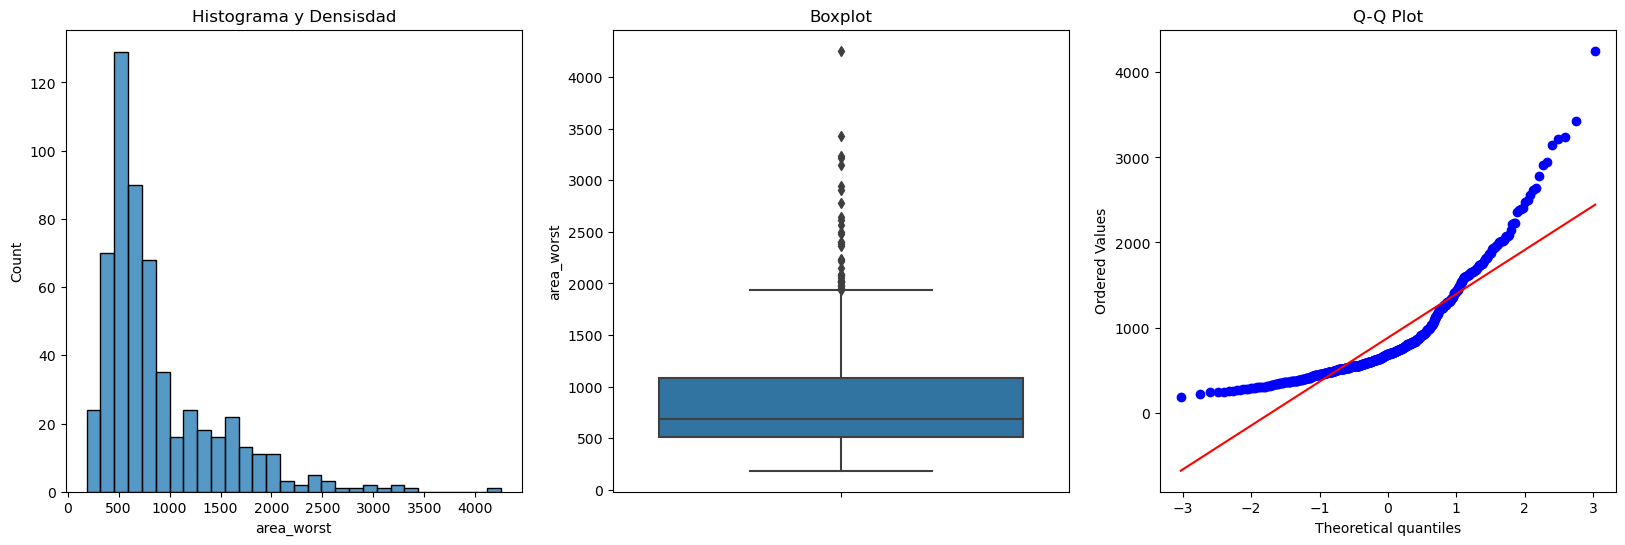

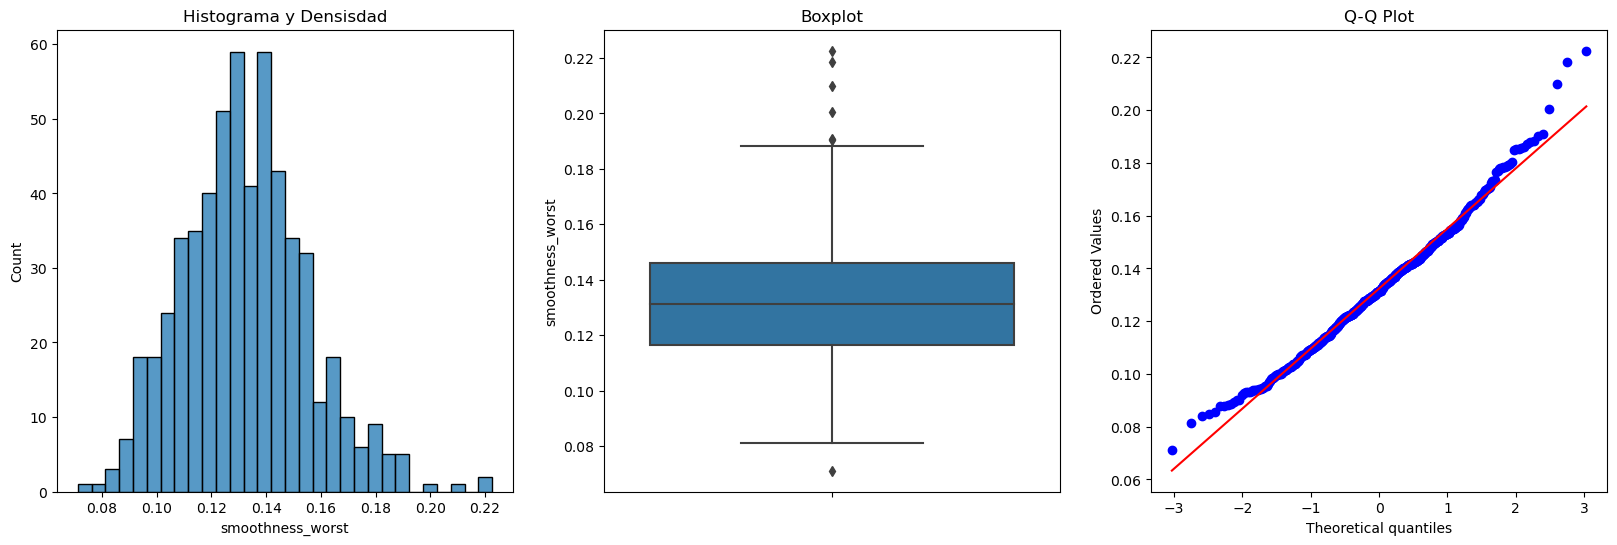

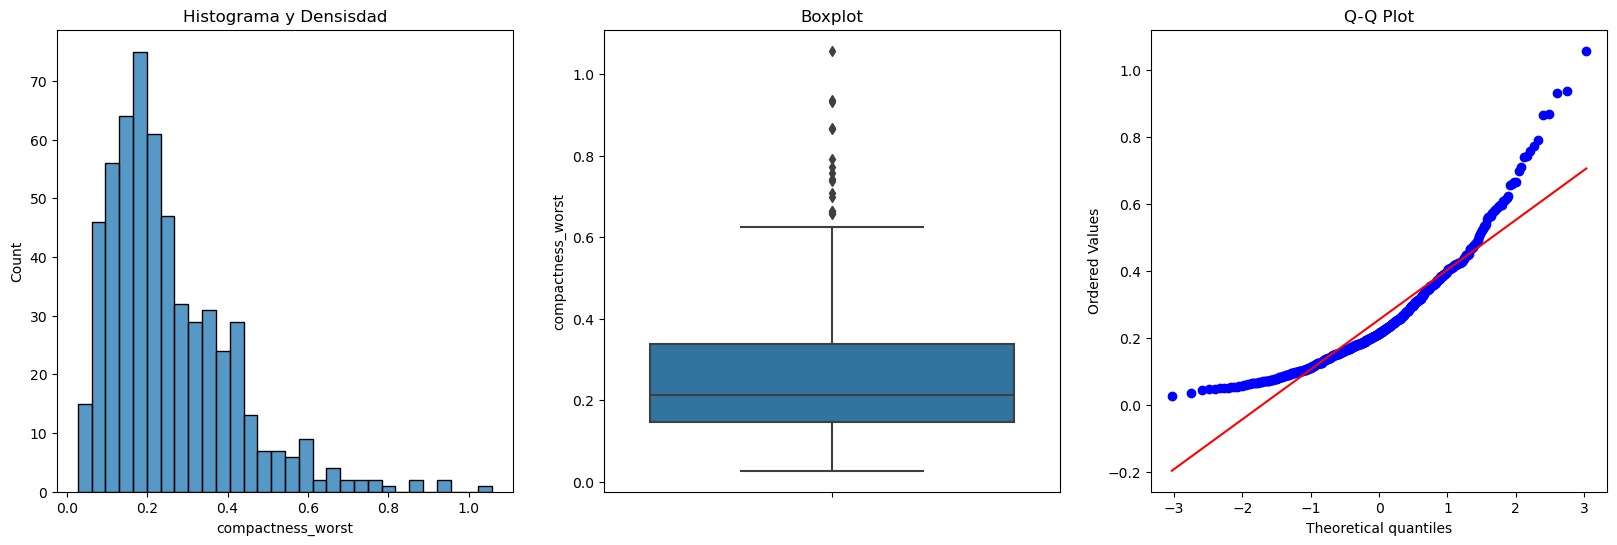

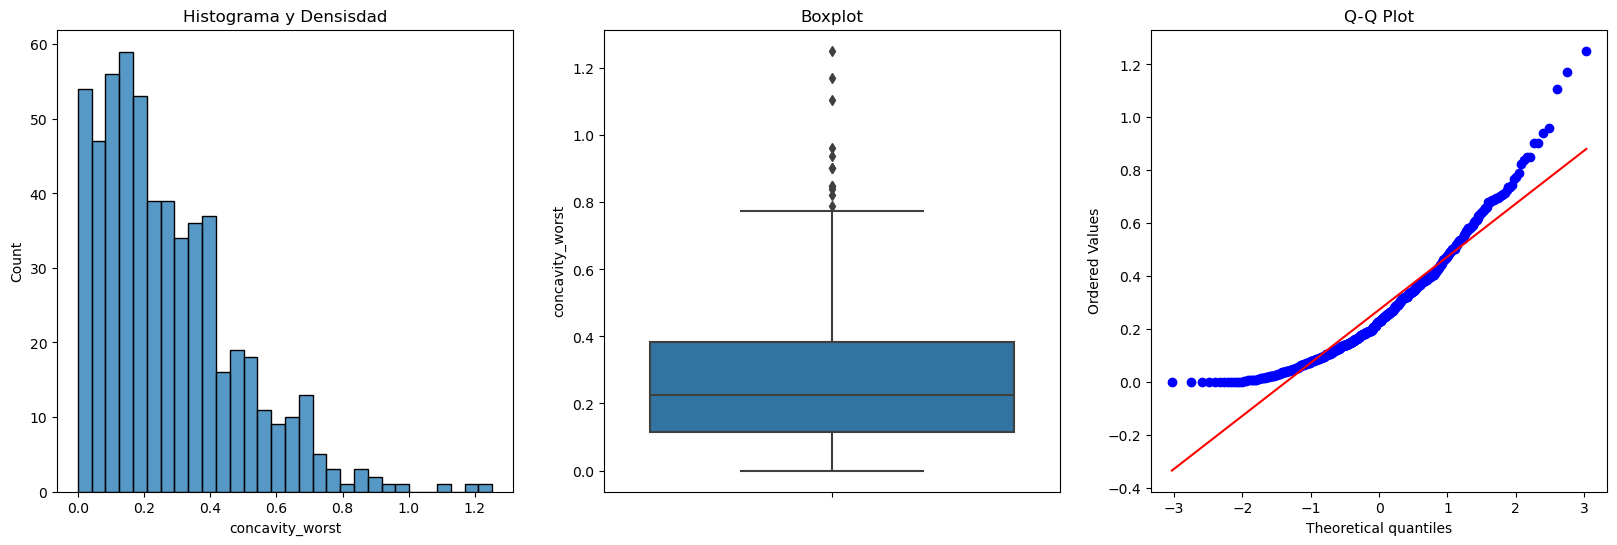

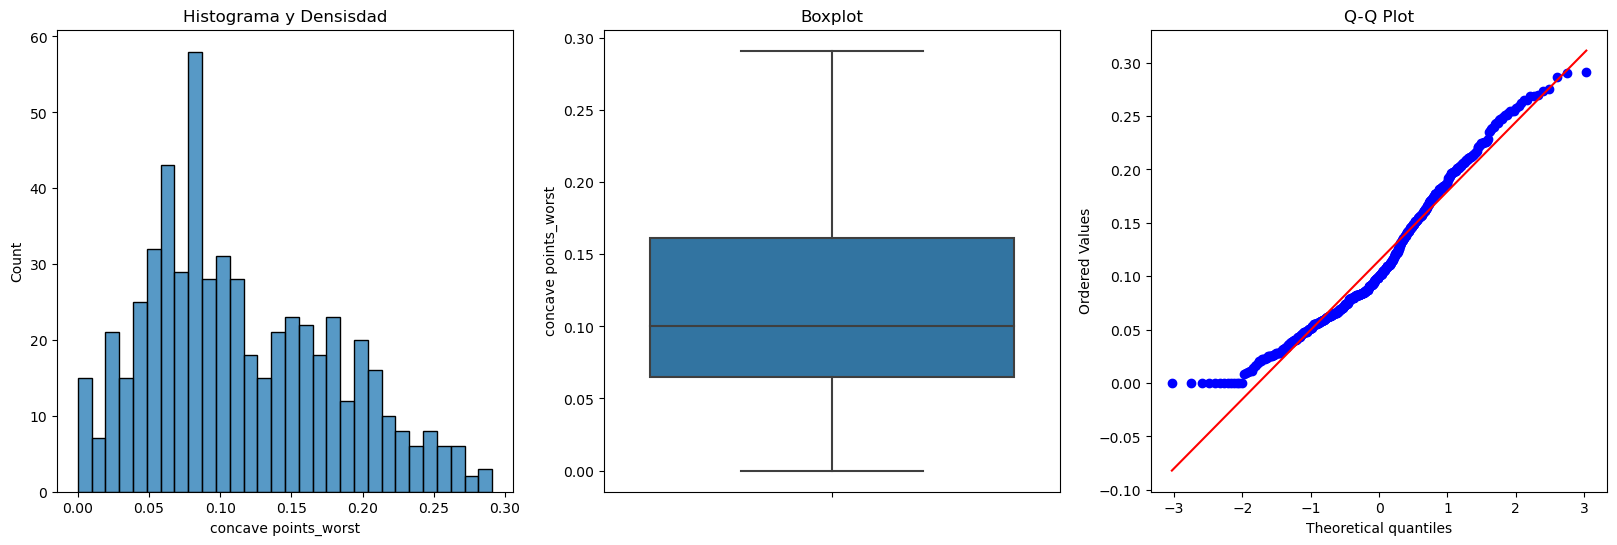

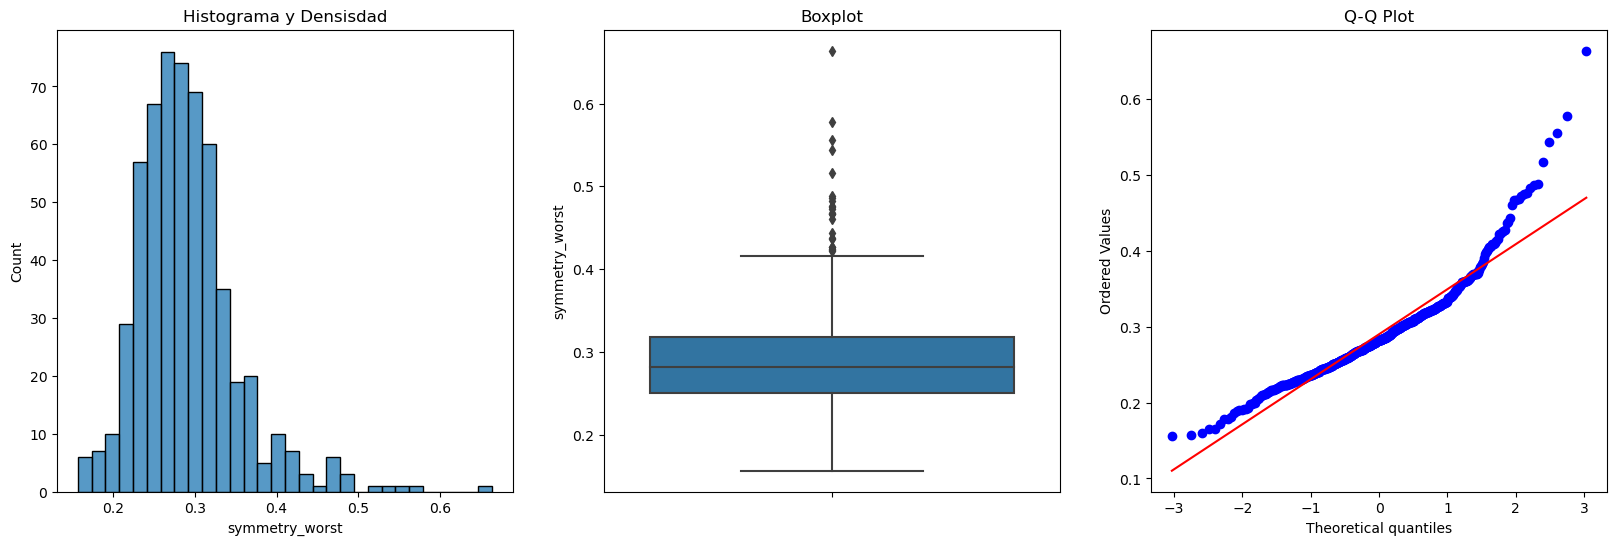

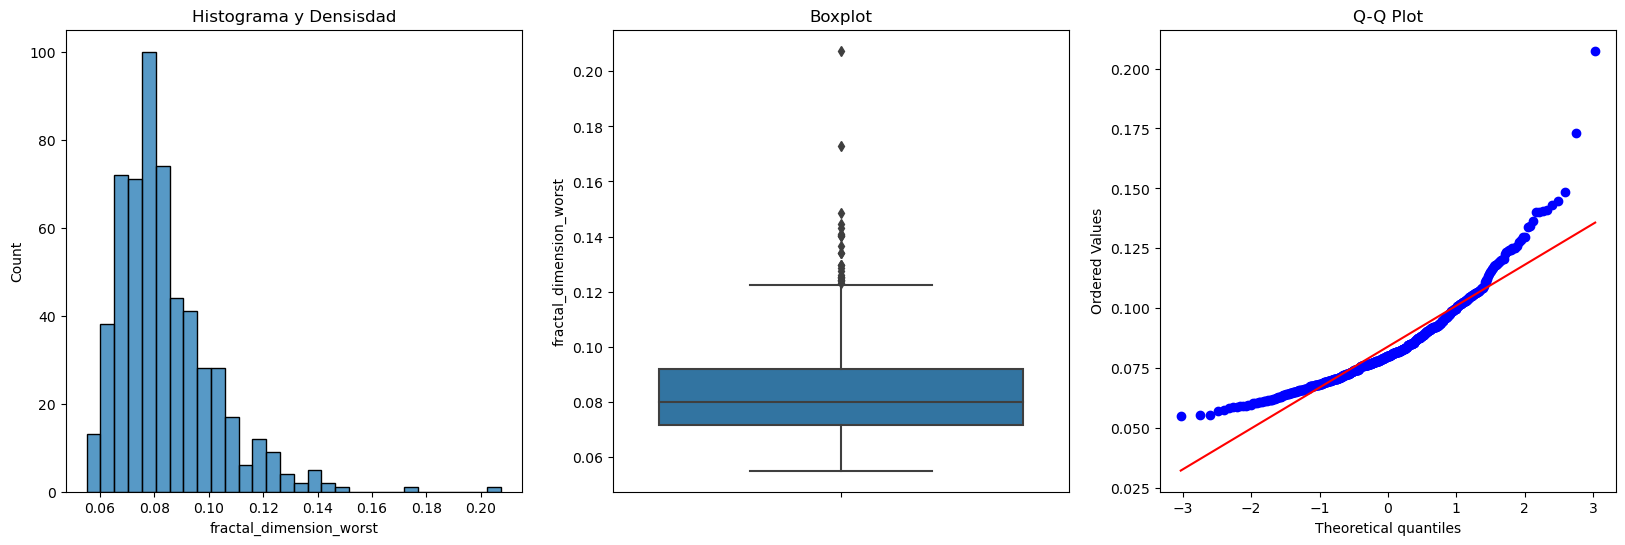

In [12]:
#mostramos el comportamiento de las variables continuas
for col in continuas:
     plotDistBoxQQ(df, col)

Outliers

In [13]:
#usamos una funcion para quitar outliers
def outl(dataset, col):
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)
     
     dataset[col] = np.where(dataset[col]  > LS, LS, 
     np.where(dataset[col] < 0, 0,dataset[col] ))

In [14]:
#corremos la funcion de outliers en las variables continuas
for col in continuas:
    outl(df, col)

C:\Users\Pc\AppData\Local\Temp\ipykernel_23240\3224723402.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 6))


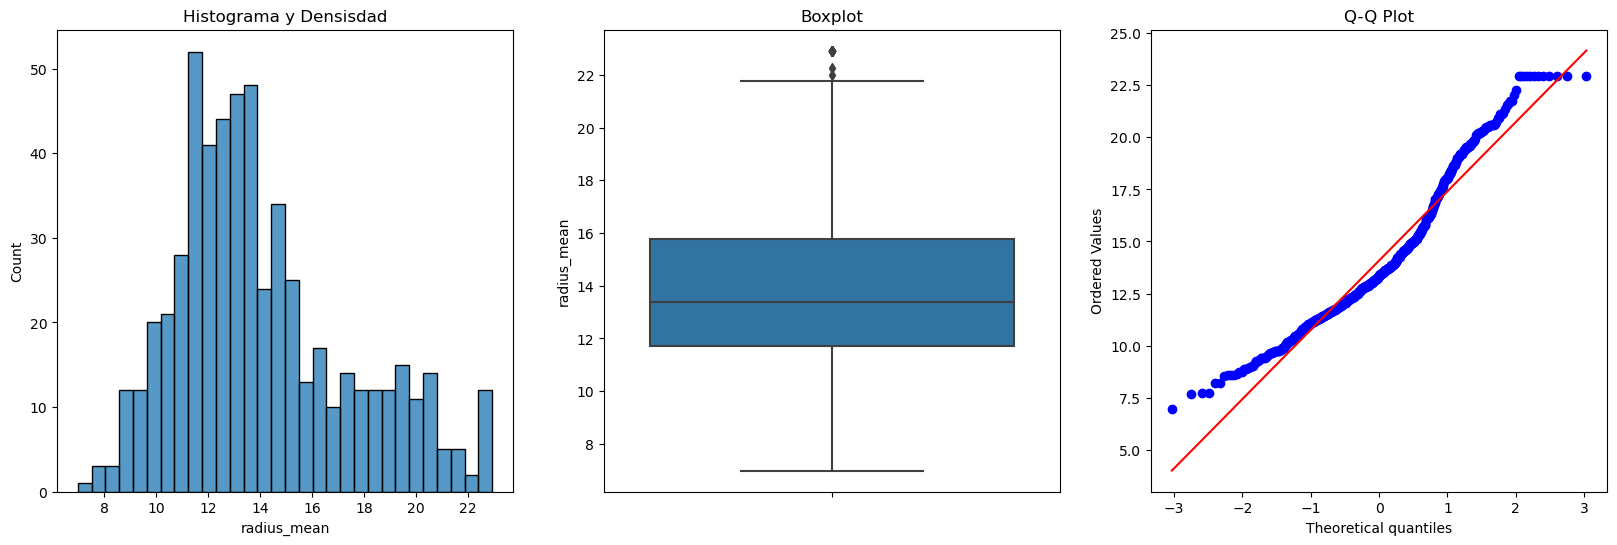

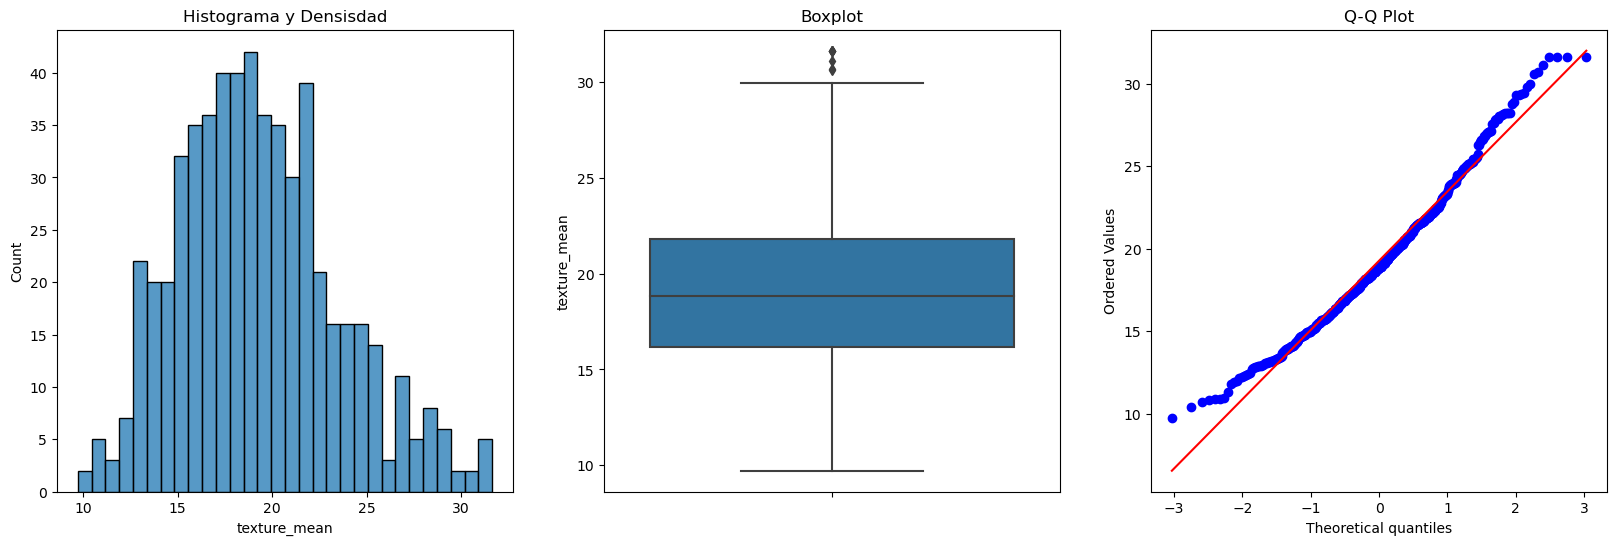

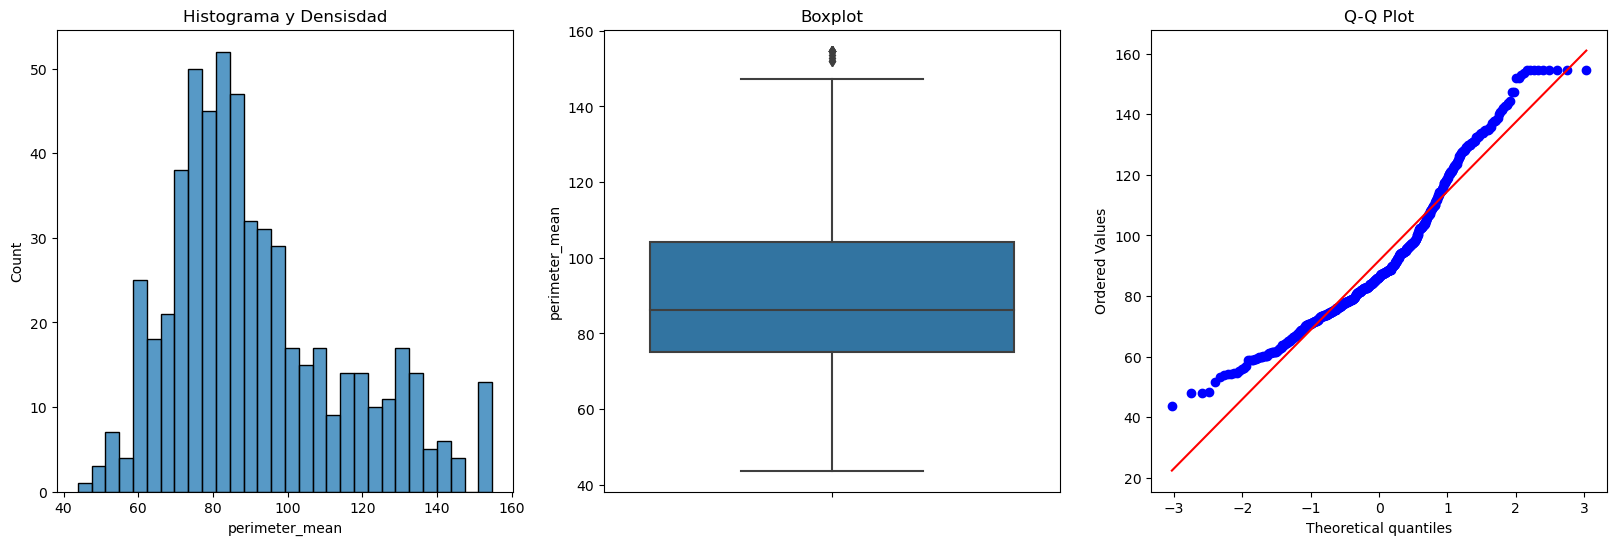

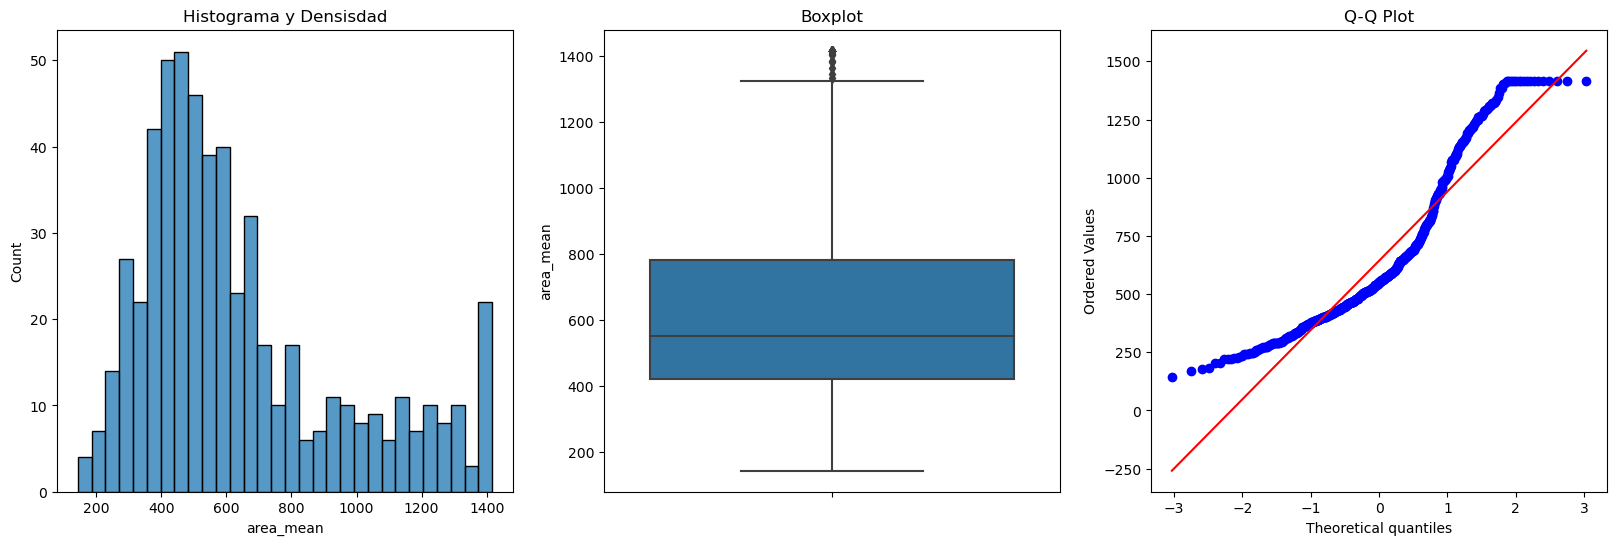

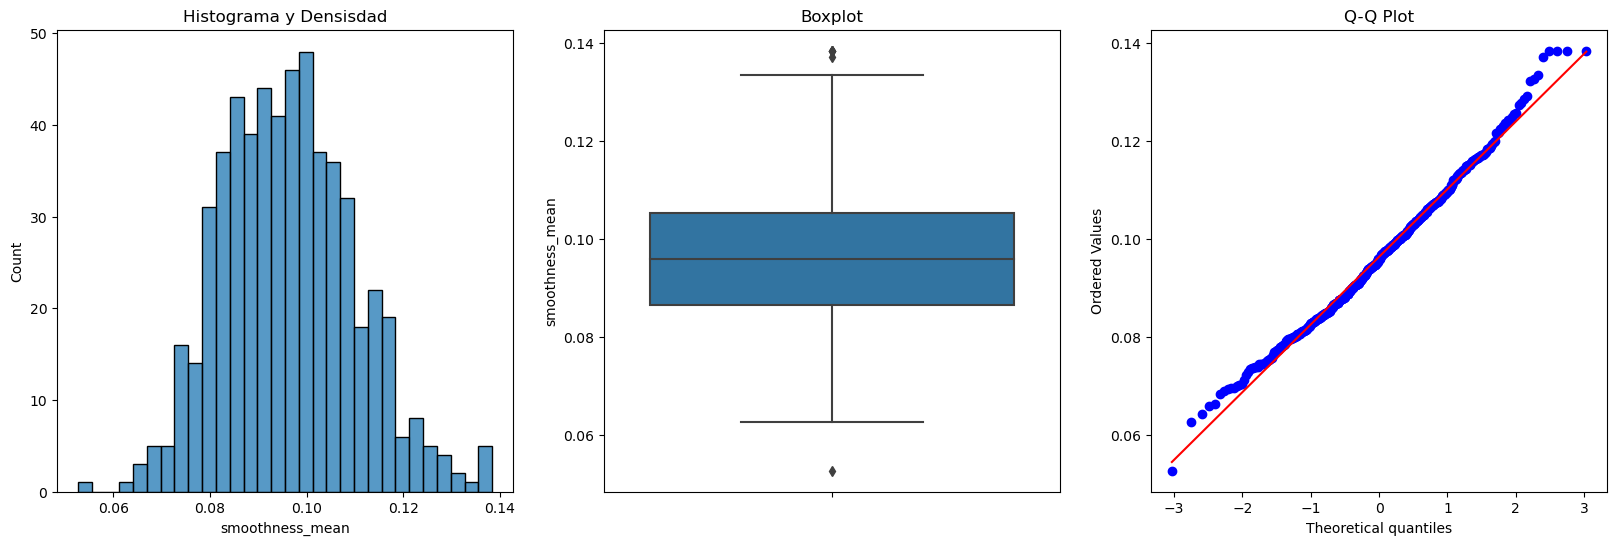

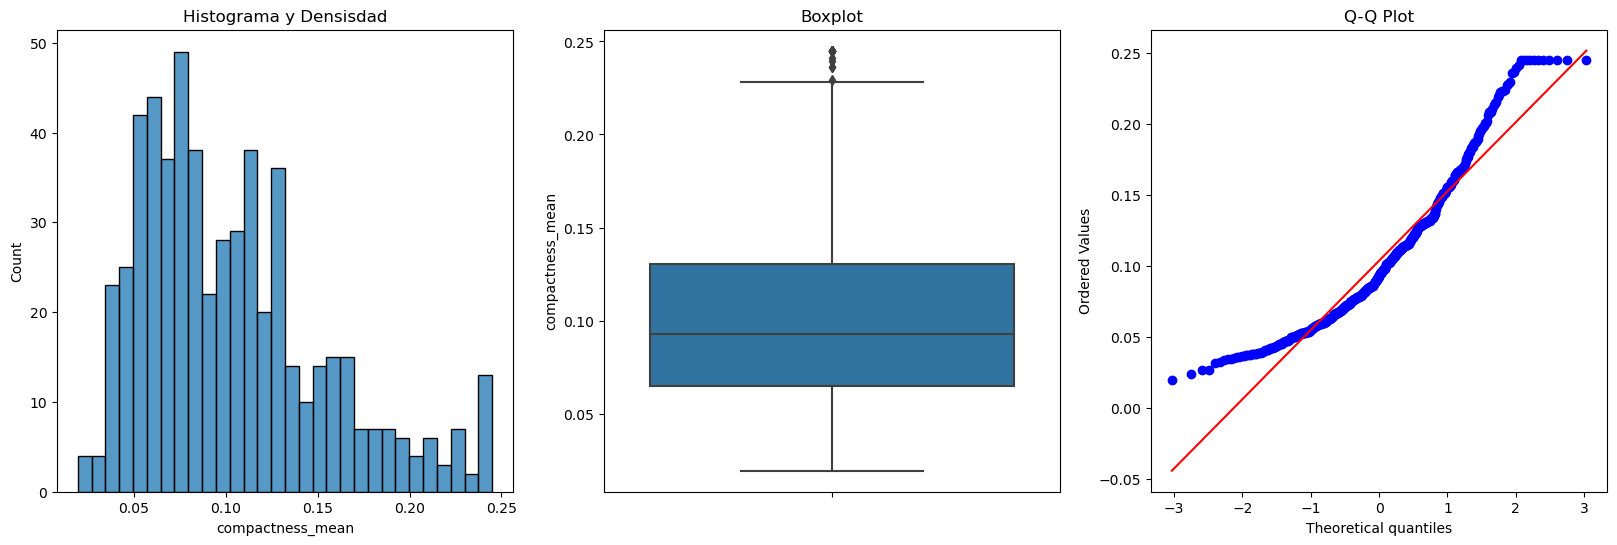

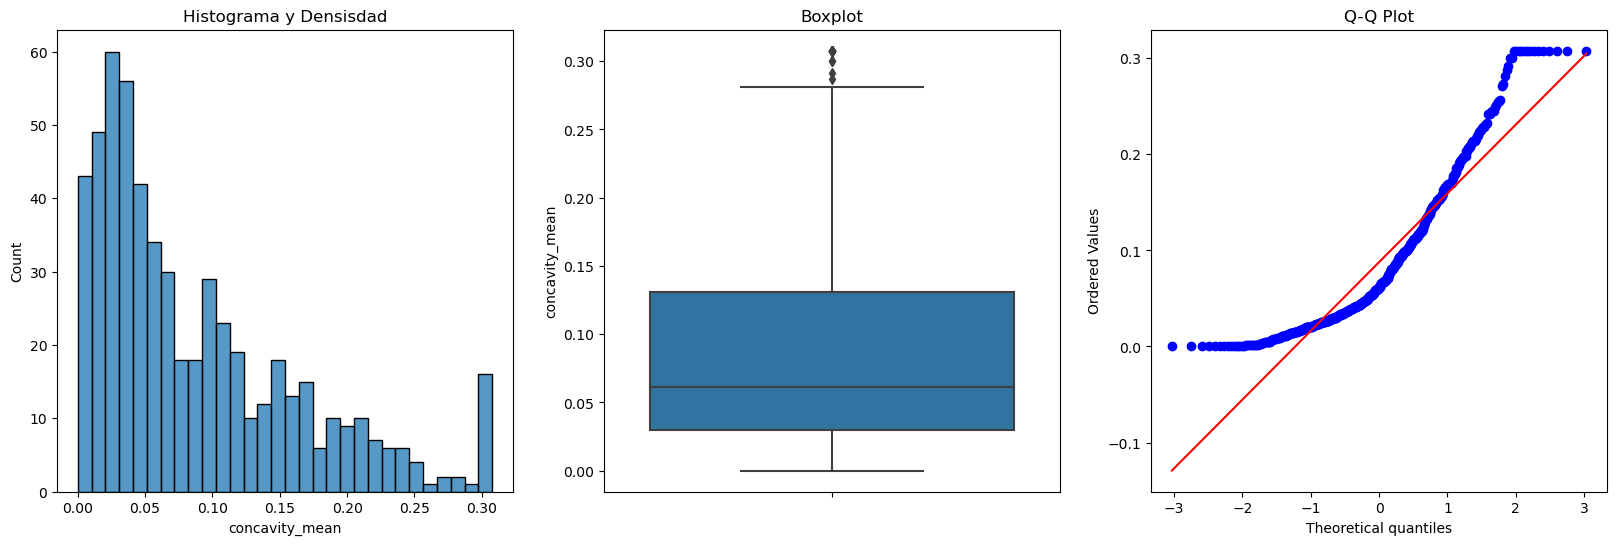

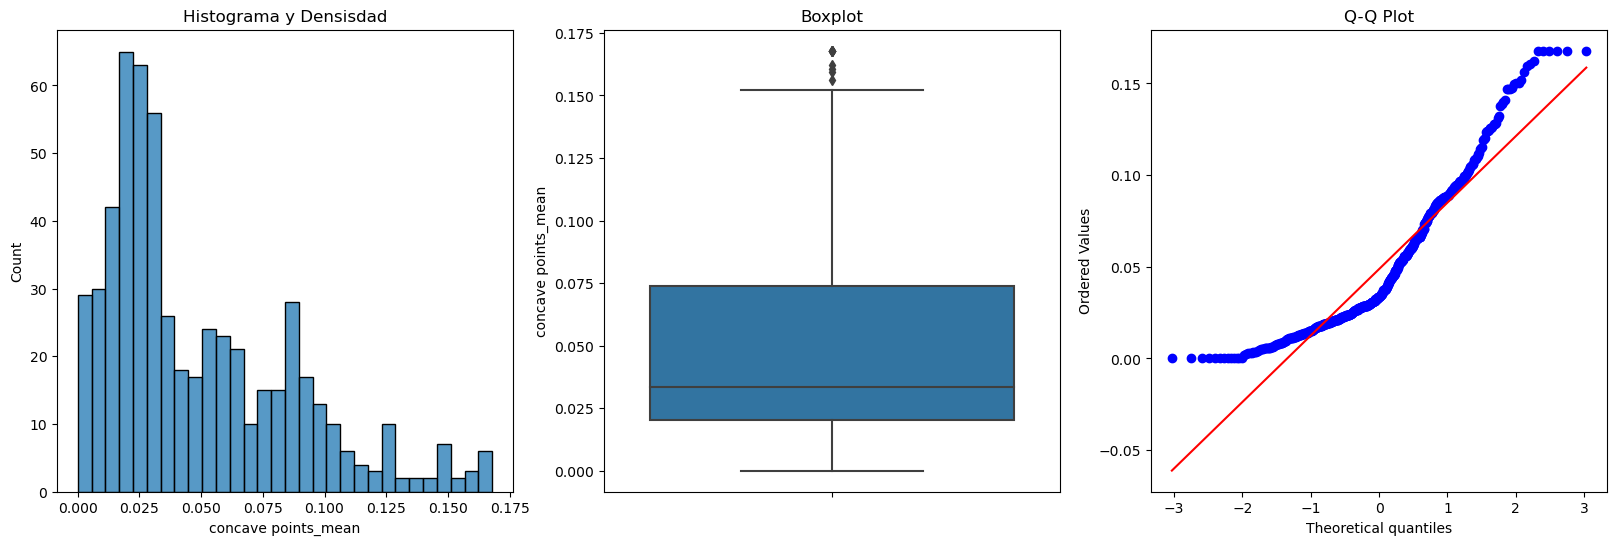

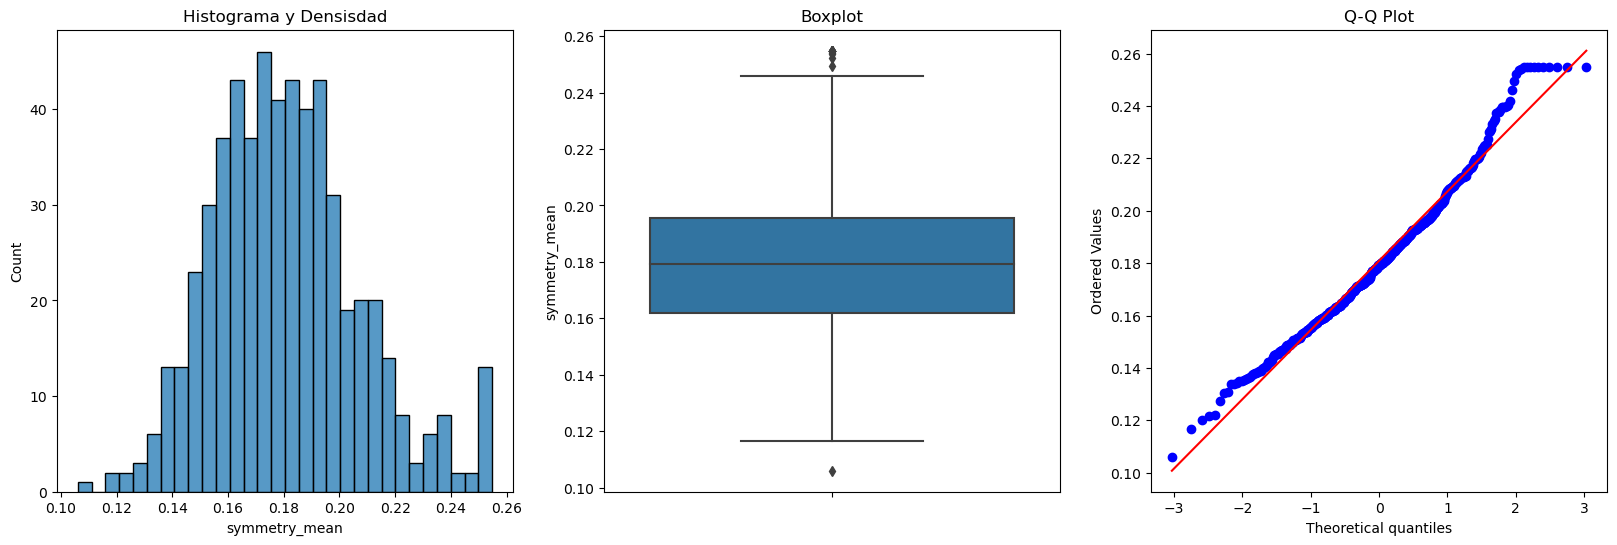

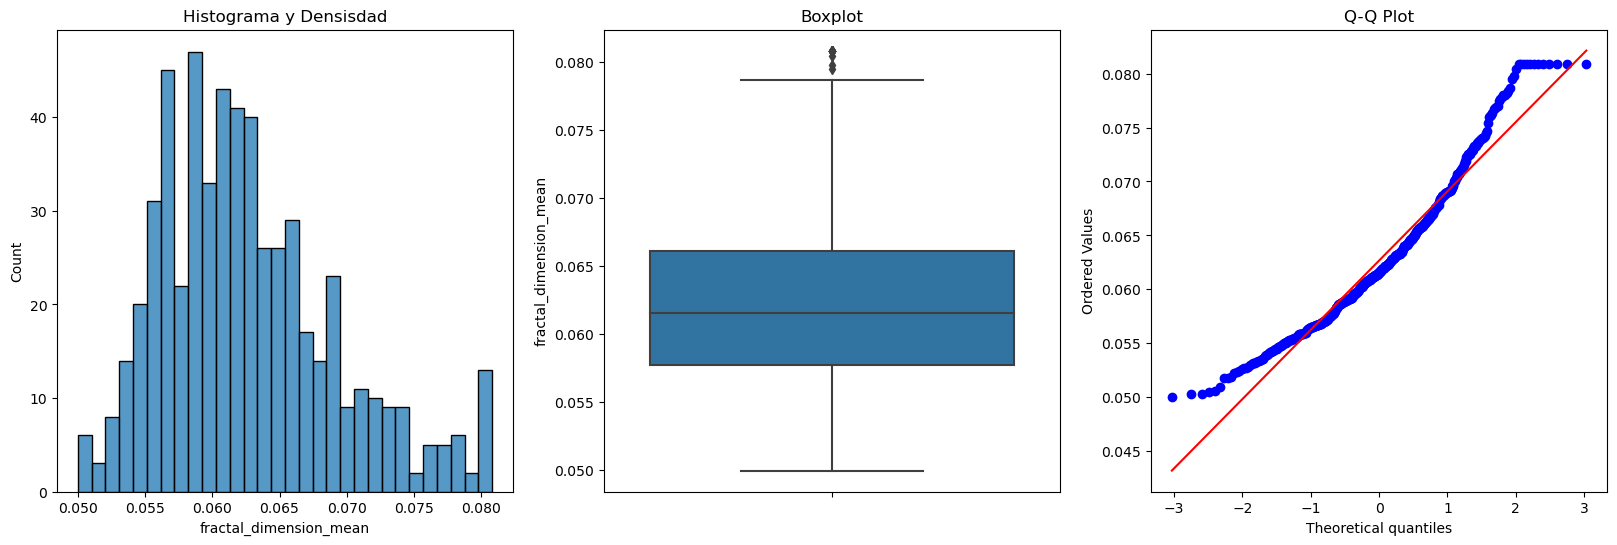

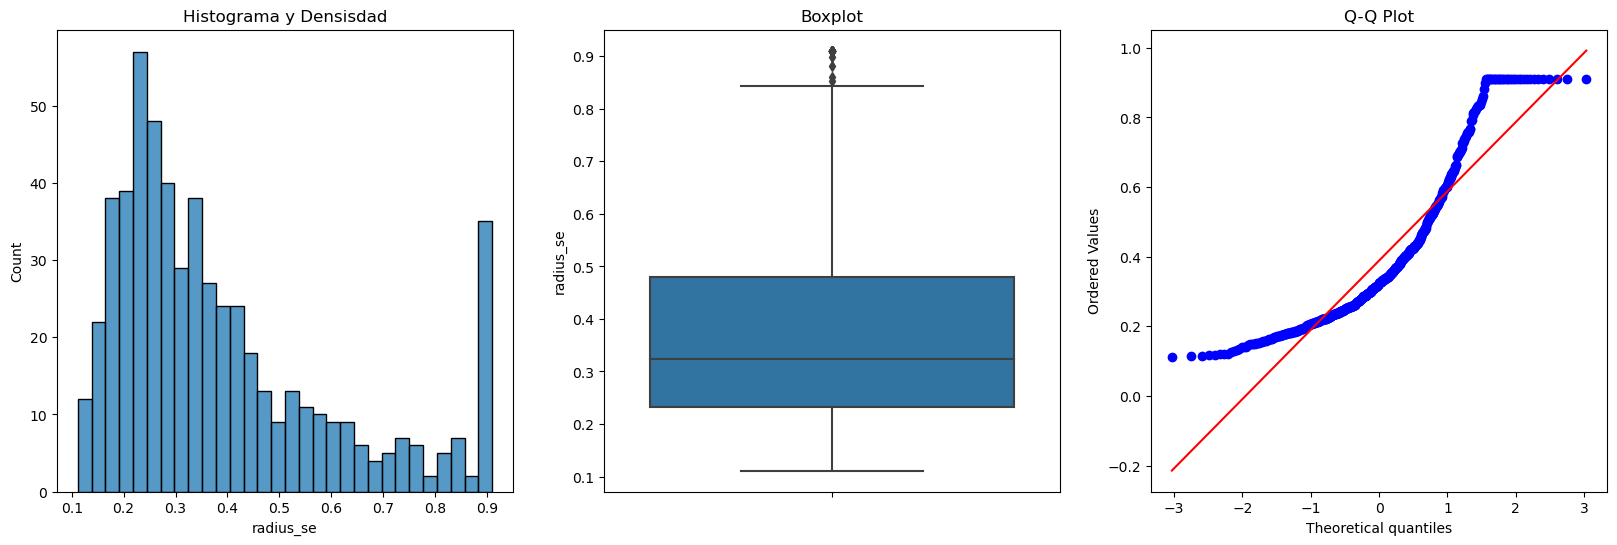

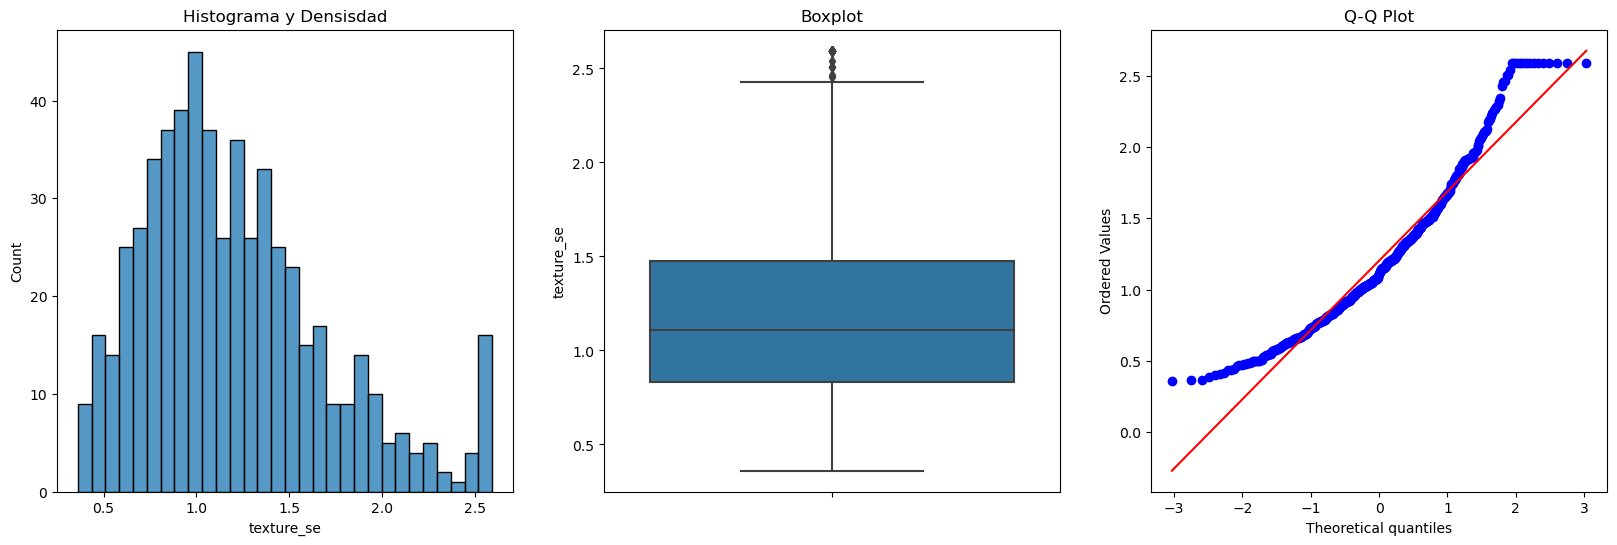

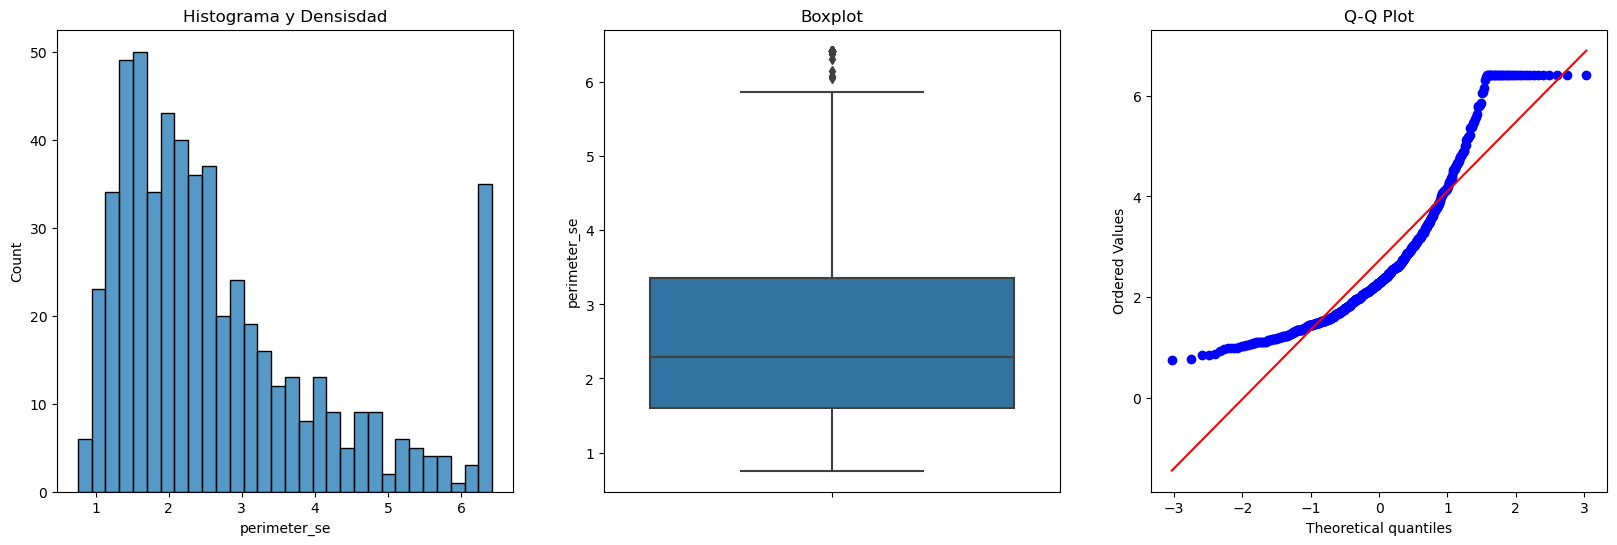

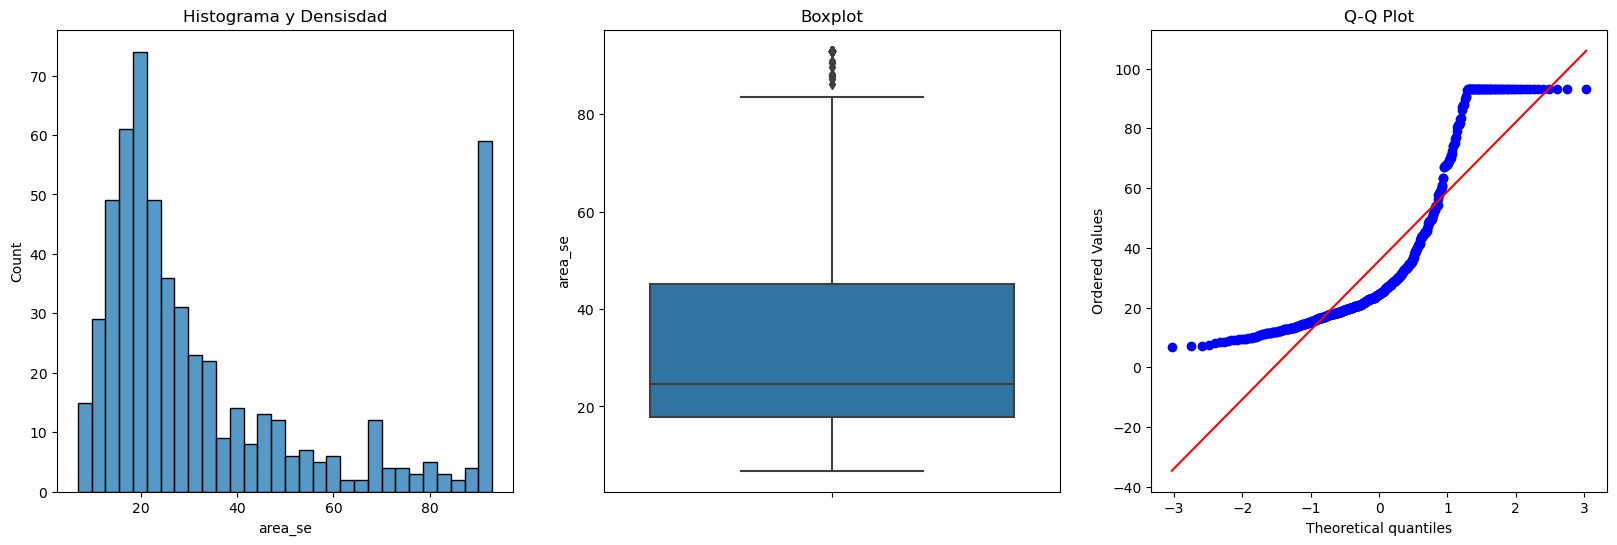

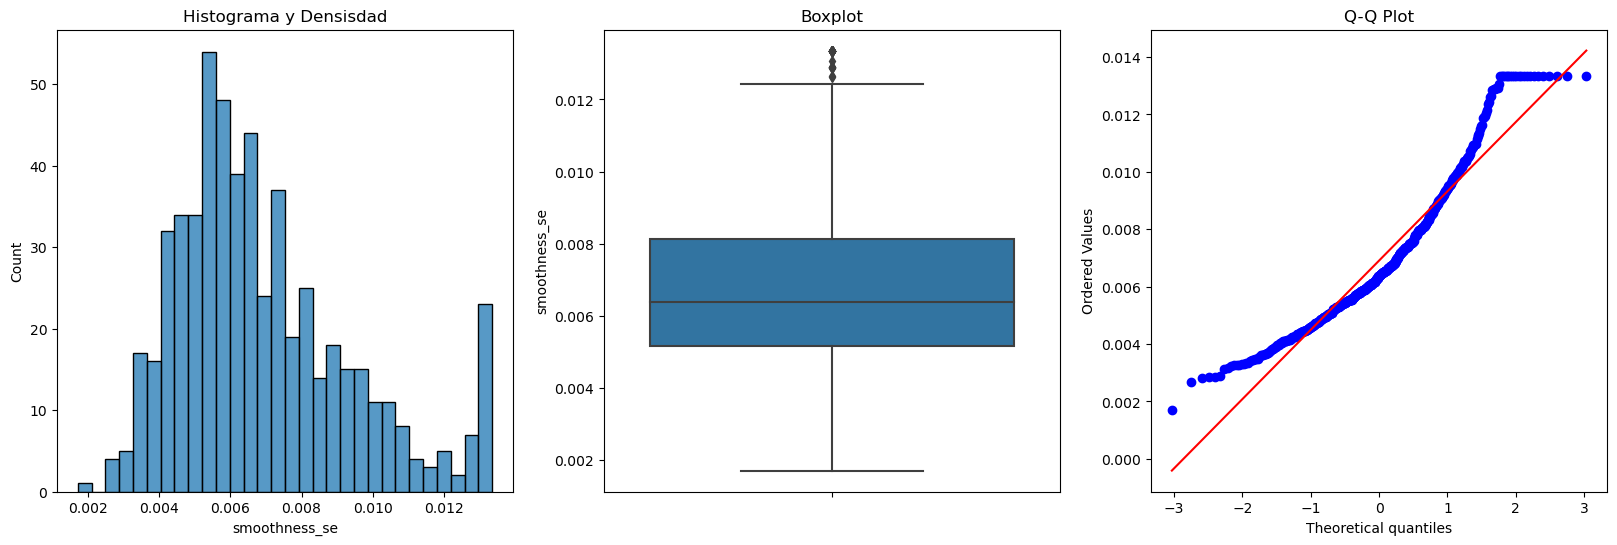

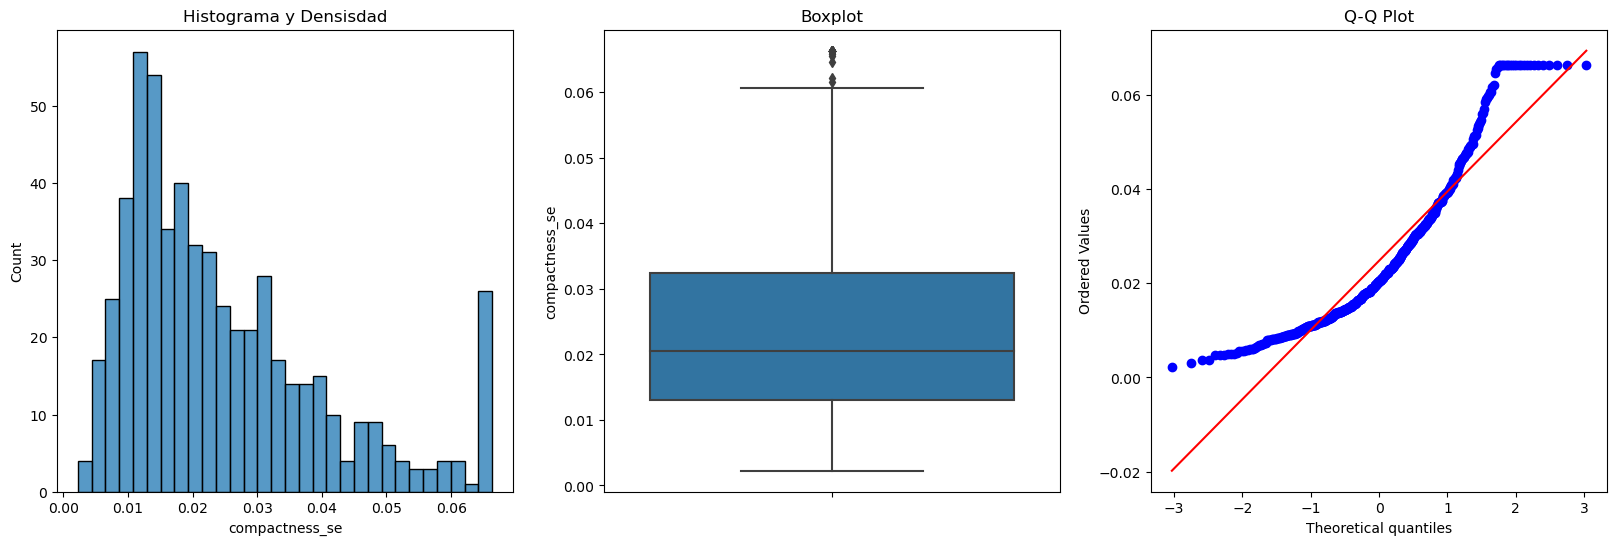

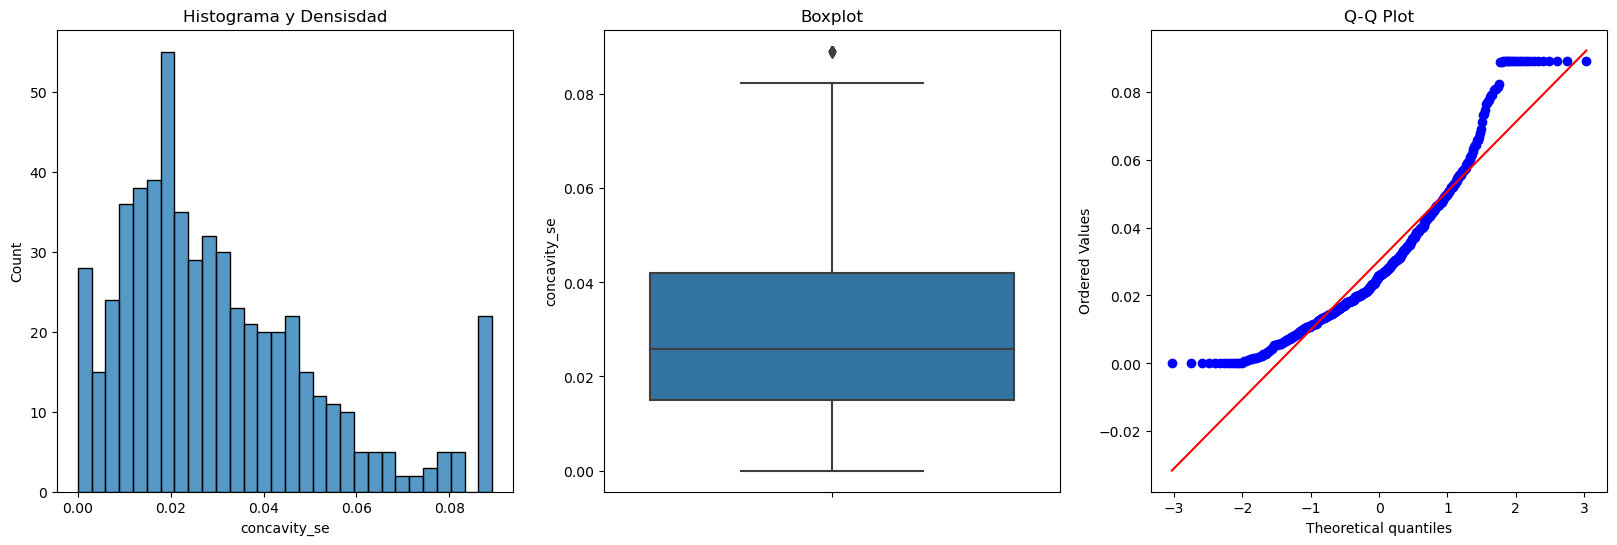

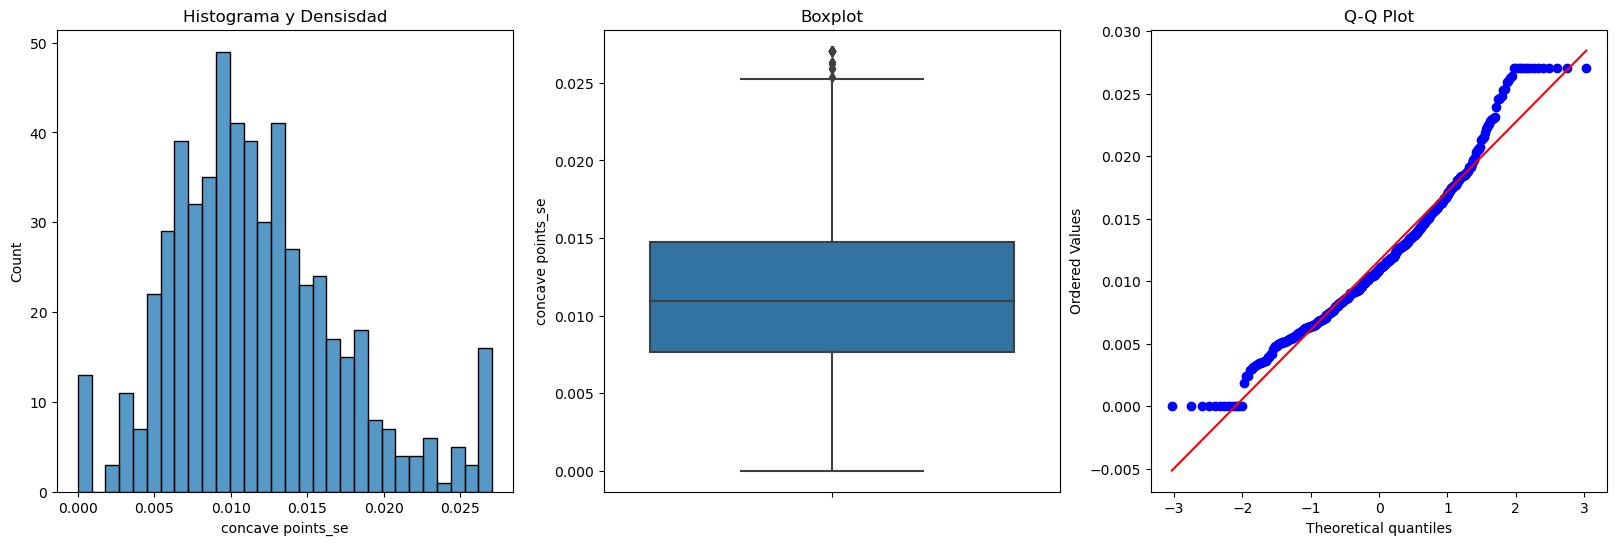

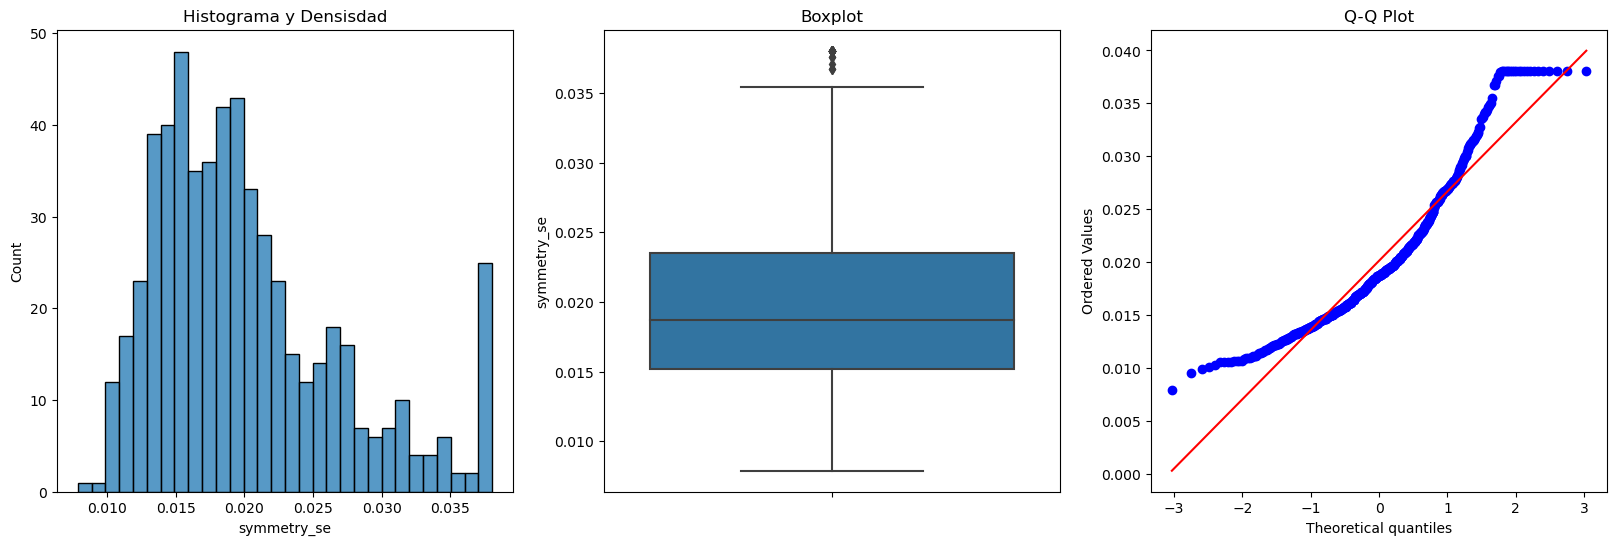

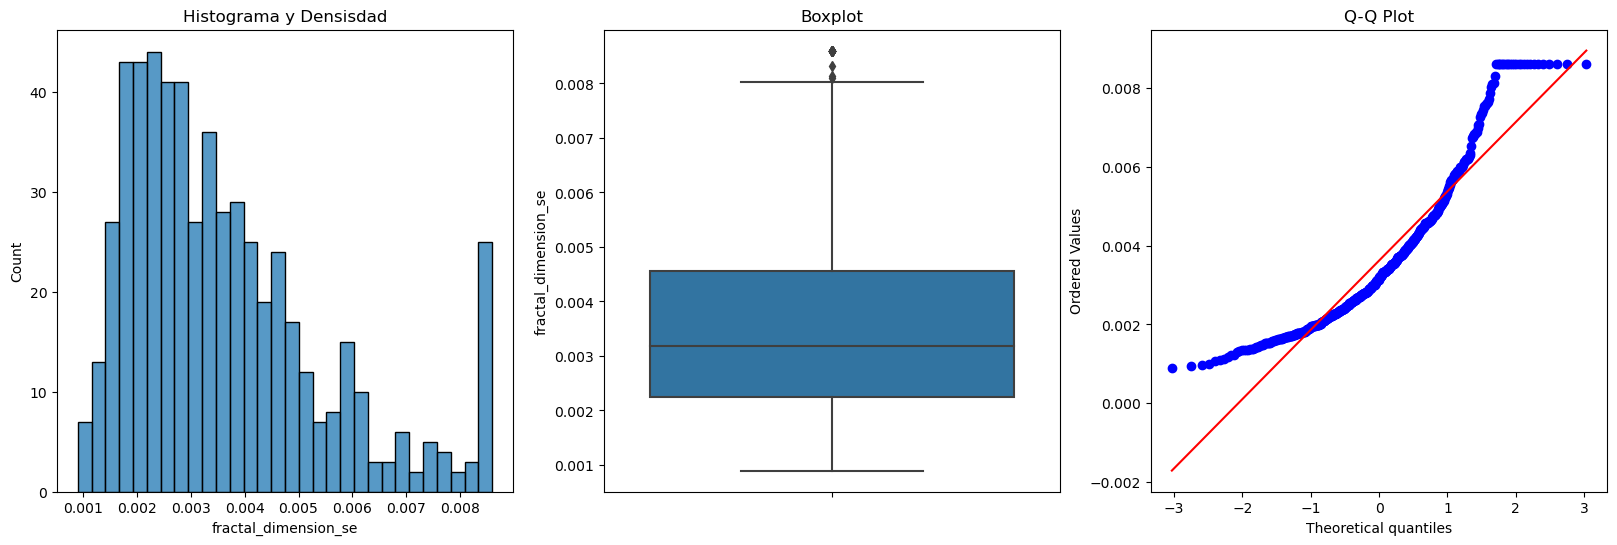

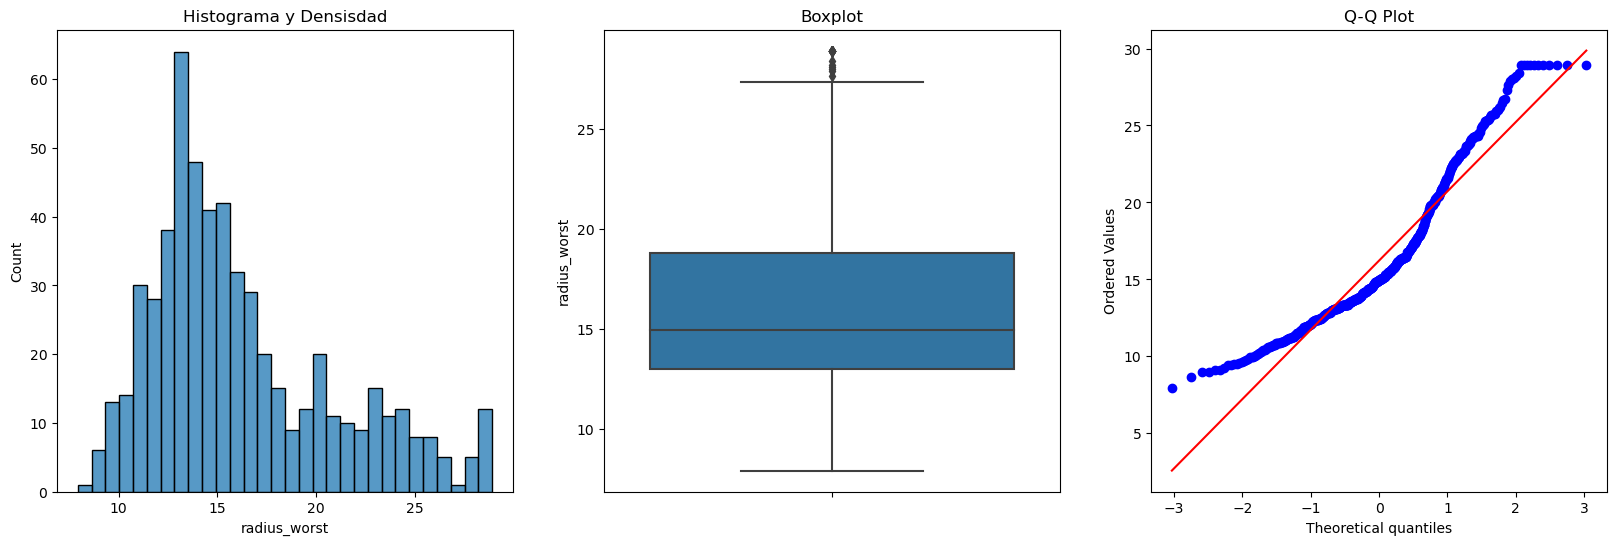

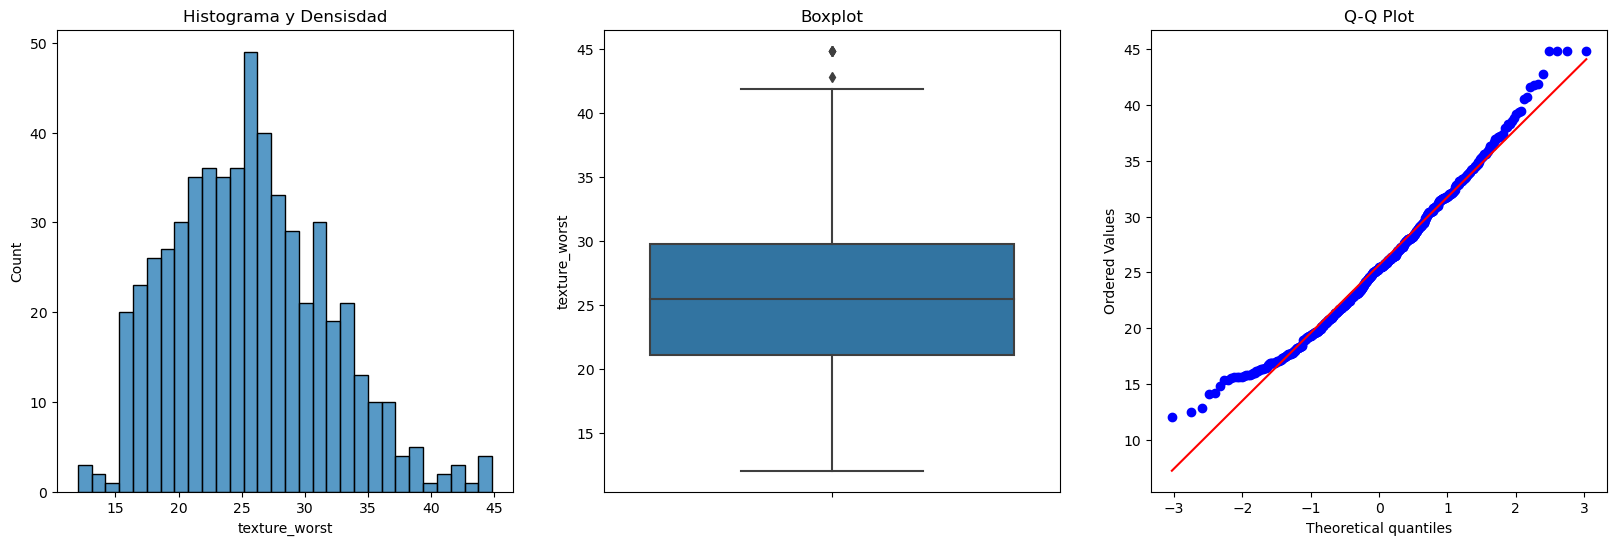

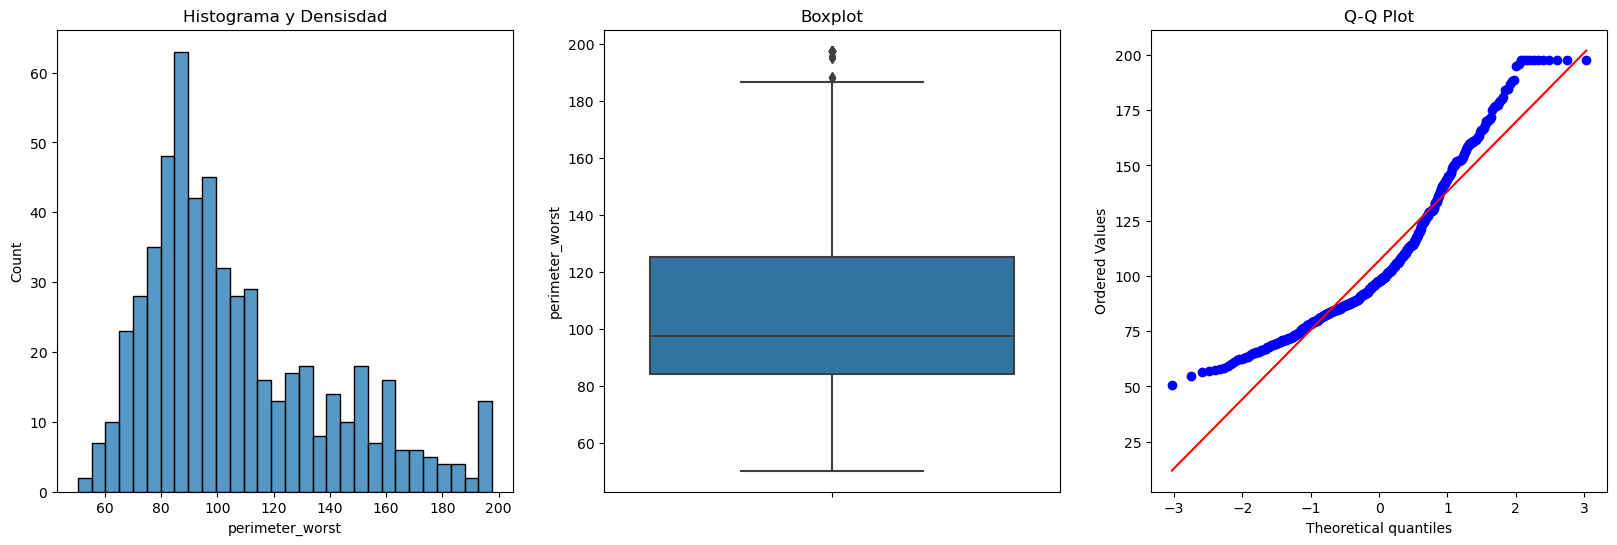

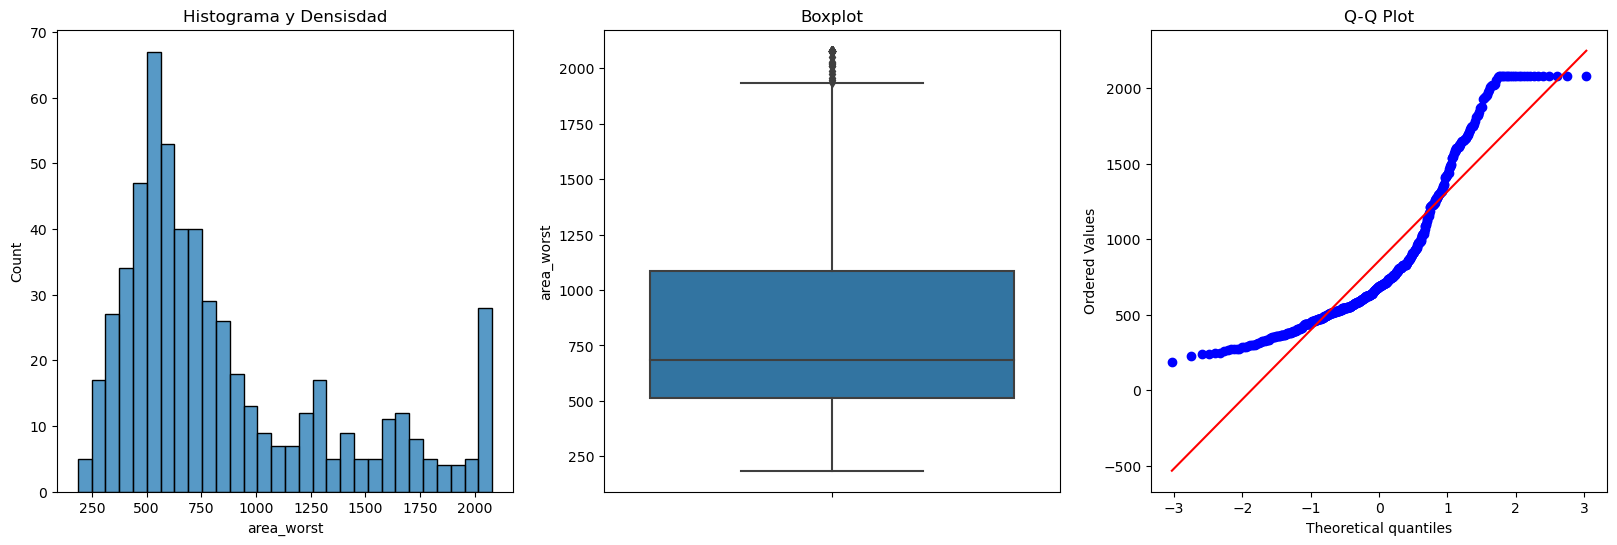

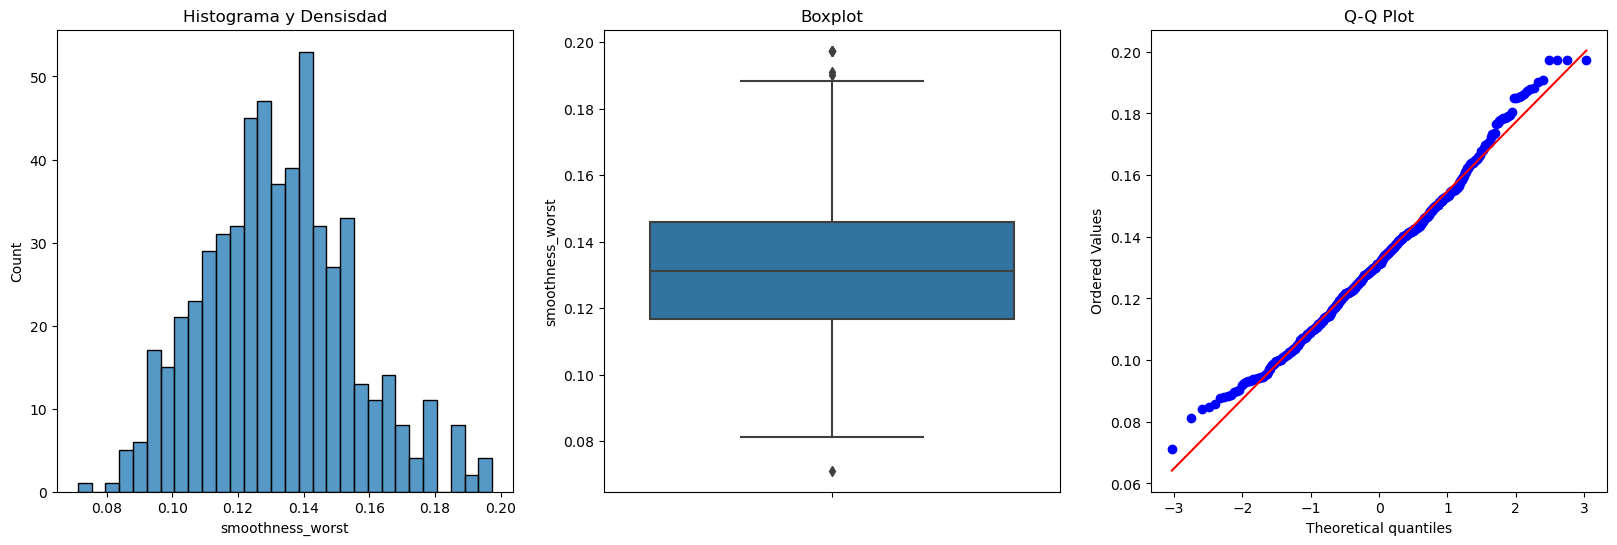

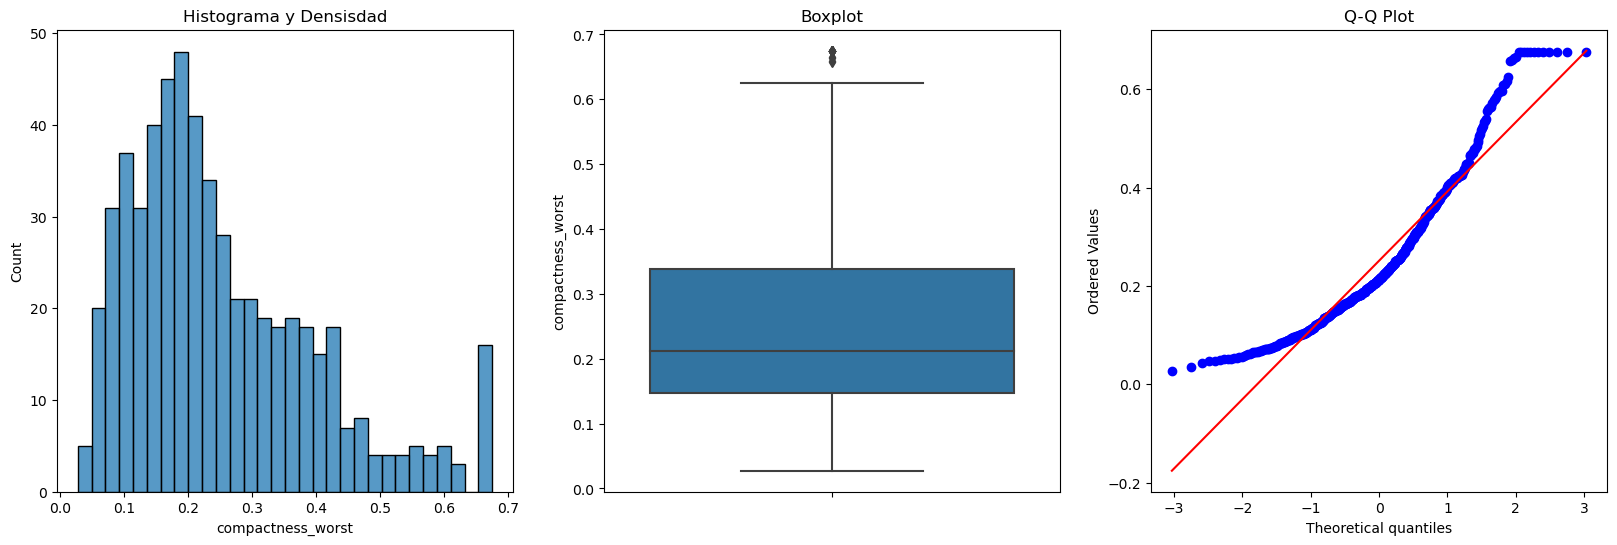

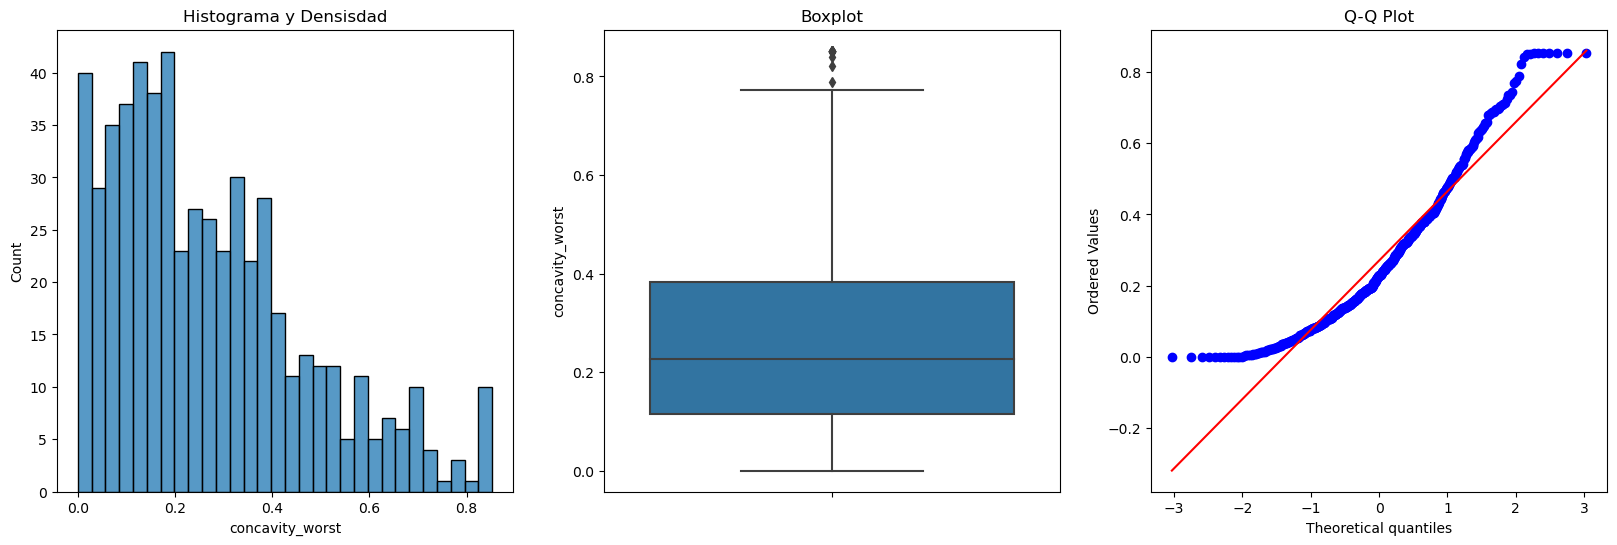

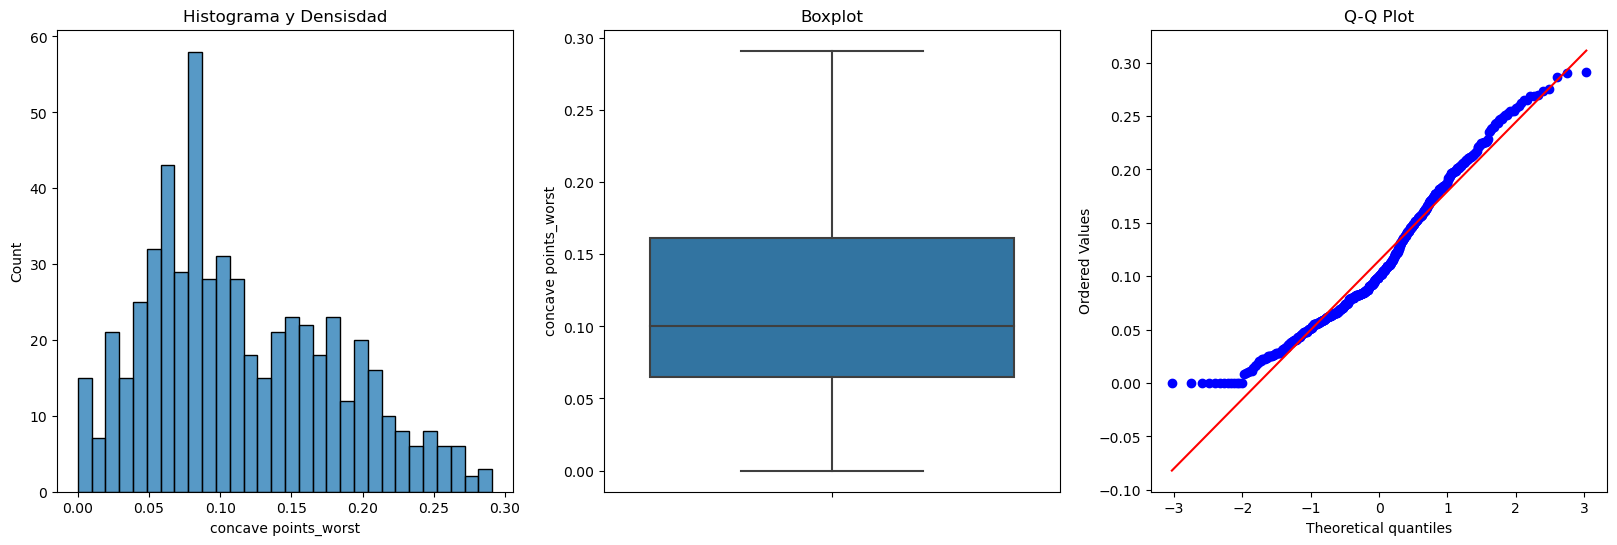

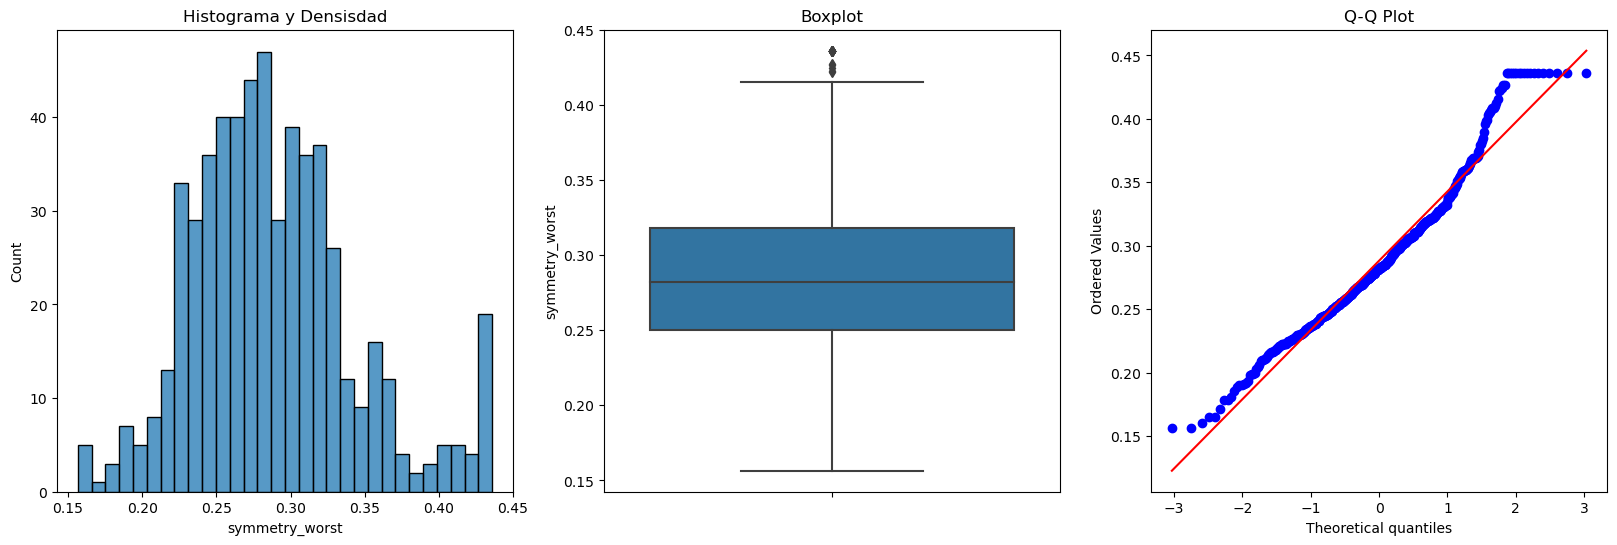

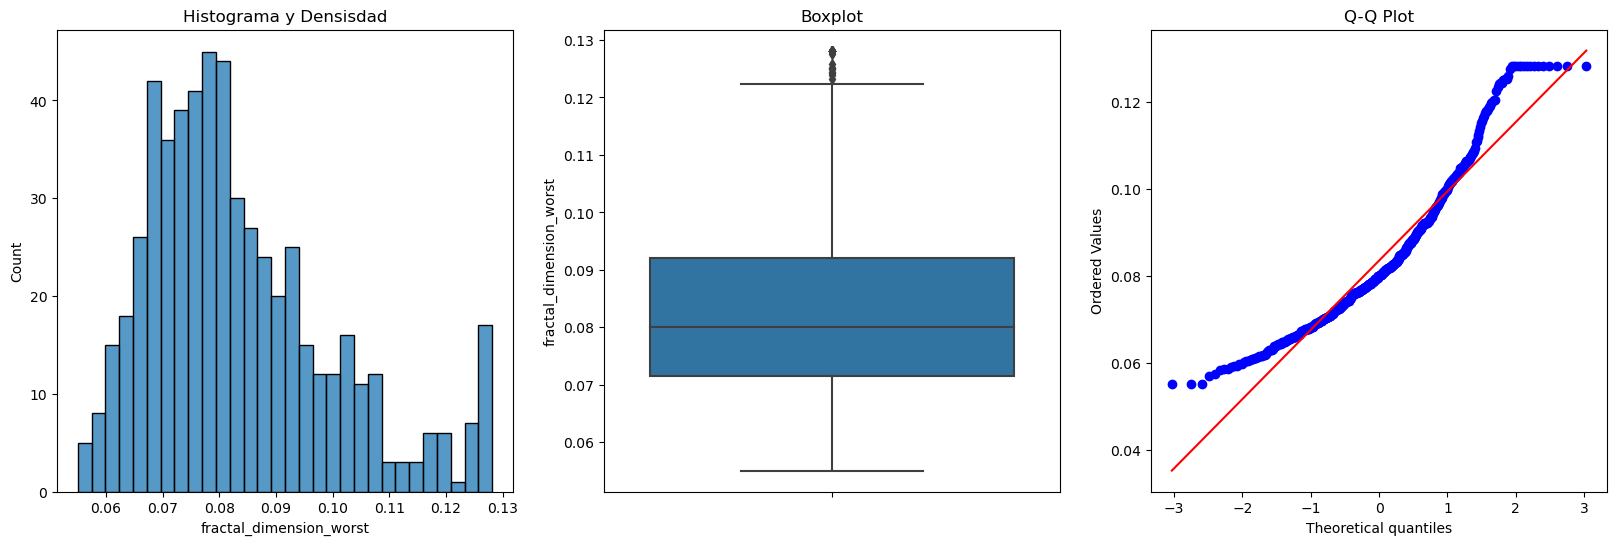

In [15]:
#validamos de nuevo el comportamiento 
#mostramos el resultado de las variables con los nuevos limites
for col in continuas:
     plotDistBoxQQ(df, col)

Transformamos nuestras variable dependiente 'y' de categórica a valor numérico

In [16]:
lb = LabelEncoder()
y = lb.fit_transform(y)

Dividimos nuestro dataset para train y test 

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [18]:
#aplicamos scaler a nuestros datos
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

Modelo de red neuronal artificial

In [36]:
#creamos e iniciamos nuestro modelo de red neuronal
model = tf.keras.models.Sequential()

In [37]:
#agregamos las capas ocultas
model.add(kr.layers.Dense(9, input_dim=30, activation='relu'))
model.add(kr.layers.Dense(9, activation='relu'))

#agreagmos la ultima capa (de salida)
model.add(kr.layers.Dense(1, activation='sigmoid'))


In [38]:
#compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
#aplicamos fit al modelo 
model_fit = model.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.5248 - accuracy: 0.8266
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.8442
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8668
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.8894
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8995
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.9020
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.9070
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.9095
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.9146
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.9171
Epoch 11/100
4/4 [===========

In [50]:
#predecimos con nuestro modelo
y_pred = model.predict(xtest)
#convertimos valores 
y_pred = (y_pred>0.5)
y_pred

6/6 [==============================] - 0s 3ms/step


array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

Evaluacion del modelo 

In [58]:
#evaluamos en una matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('Accuracy:',score)

[[113   2]
 [  2  54]]
Accuracy: 0.9766081871345029


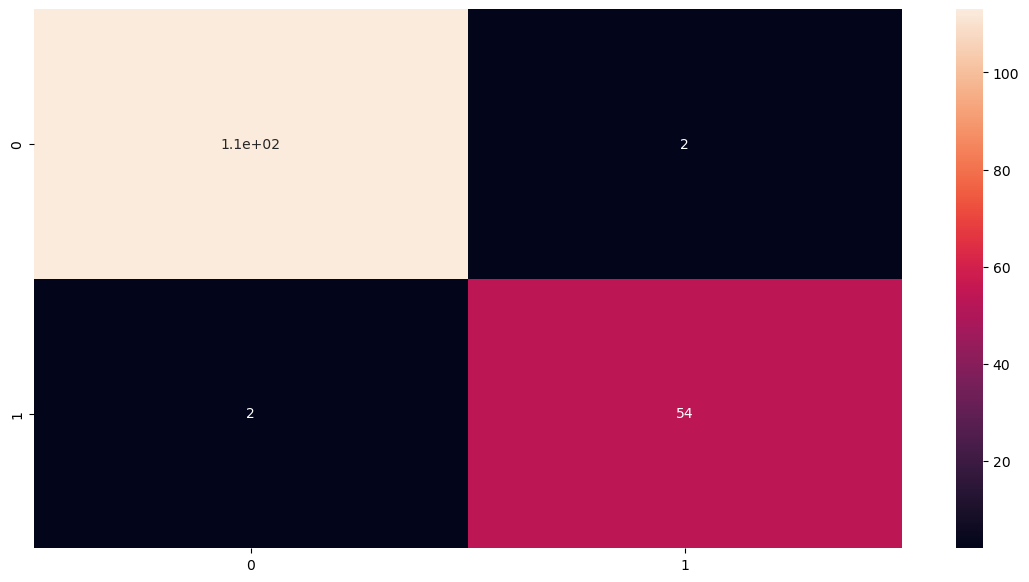

In [52]:
#Creamos una visualizacion de la matriz de confusion 
#Vemos que el modelo tiene un accuracy alta
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


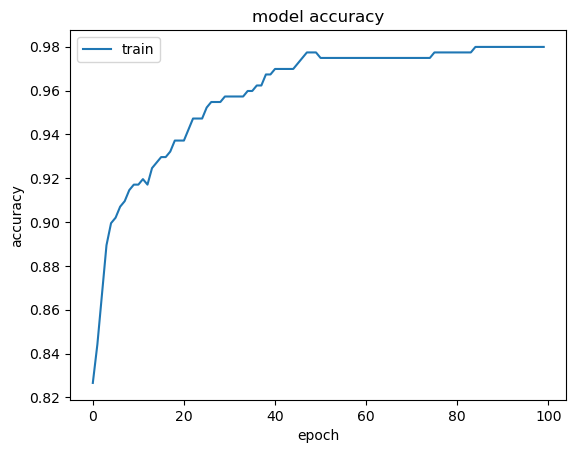

In [59]:
#Vemos como afectaron la cantidad de epocas en el modelo
print(model_fit.history.keys())

#Grafica para visualizar el history de accuracy
plt.plot(model_fit.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

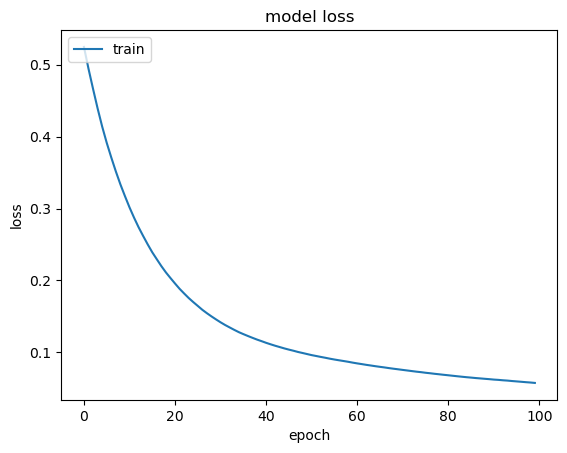

In [60]:
#Vemos como afectan la cantidad las epocas con la perdida
plt.plot(model_fit.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()